In [1]:
from datetime import datetime
from itertools import cycle
from math import sqrt
import numpy as np
import pandas as pd
from scipy import stats, interp
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIR = "/home/griggs/TheBeeCorp/Github/ir_hive_grading/"

### Getting IR pics data input table from csv

In [3]:
def clean_X(df):
    df['date_time'] = pd.to_datetime(df['date_time'],  format="%Y-%m-%d %H:%M:%S")
    df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
    df['date'] = df['date'].map(lambda x: pd.Timestamp(x))
    df.drop(["Unnamed: 0"], axis=1, inplace=True)
    return df

In [4]:
prev_df = pd.read_csv(DIR + "csvs/dataprep_unfiltered_2019-02-18_comb_darksky_FeatNameUpd_pt1-16.csv")
prev_df = clean_X(prev_df)
prev_df

Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        0.0    4.0    0.0   0.0     0.0    0.0   
1        0.0    4.0    0.0   0.0     0.0    0.0   
2        0.0    2.0    0.0   0.0     0.0    0.0   
3        0.0    2.0    0.0   0.0     0.0    0.0   
4        2.0    0.0    1.0   0.0     0.0    0.0   
5        2.0    0.0    1.0   0.0     0.0    0.0   
6        0.0    0.0    3.0   0.0     0.0    0.0   
7        0.0    0.0    3.0   0.0     0.0    0.0   
8        0.0    0.0    3.0   0.0     0.0    0.0   
9        0.0    0.0    3.0   0.0     0.0    0.0   
10       0.0    0.0    3.0   0.0     0.0    0.0   
11       0.0    0.0    1.0   0.0     0.0    0.0   
12       0.0    0.0    1.0   0.0     0.0    0.0   
13       0.0    0.0    1.0   0.0     0.0    0.0   
14       2.0    0.0    1.0   0.0     0.0    0.0   
15       2.0    0.0    1.0   0.0     0.0    0.0   
16       2.0    0.0    1.0   0.0     0.0    0.0   
17       2.0    0.0    1.0   0.0     0.0    0.0   
18       0.0    0.0    3.0   0.0     0.0    0.0   
19       0.0    0.0    3.0   0.0     0.0    0.0   
20       0.0    0.0    1.0   0.0     0.0    0.0   
21       0.0    0.0    1.0   0.0     0.0    0.0   
22       2.0    0.0    1.0   0.0     0.0    0.0   
23       2.0    0.0    1.0   0.0     0.0    0.0   
24       0.0    0.0    1.0   0.0     0.0    0.0   
25       2.0    0.0    1.0   0.0     0.0    0.0   
26       0.0    0.0    3.0   0.0     0.0    0.0   
27       0.0    0.0    1.0   0.0     0.0    0.0   
28       0.0    0.0    1.0   0.0     0.0    0.0   
29       0.0    0.0    1.0   0.0     0.0    0.0   
...      ...    ...    ...   ...     ...    ...   
3936     2.0    0.0    0.0   0.0     0.0    0.0   
3937     2.0    0.0    0.0   0.0     0.0    0.0   
3938     2.0    0.0    0.0   0.0     0.0    0.0   
3939     1.0    0.0    0.0   0.0     0.0    0.0   
3940     1.0    0.0    0.0   0.0     0.0    0.0   
3941     1.0    0.0    0.0   0.0     0.0    0.0   
3942     2.0    0.0    0.0   0.0     0.0    0.0   
3943     2.0    0.0    0.0   0.0     0.0    0.0   
3944     2.0    0.0    0.0   0.0     0.0    0.0   
3945     2.0    0.0    0.0   0.0     0.0    0.0   
3946     2.0    0.0    0.0   0.0     0.0    0.0   
3947     2.0    0.0    0.0   0.0     0.0    0.0   
3948     2.0    0.0    0.0   0.0     0.0    0.0   
3949     2.0    0.0    0.0   0.0     0.0    0.0   
3950     2.0    0.0    0.0   0.0     0.0    0.0   
3951     2.0    0.0    0.0   0.0     0.0    0.0   
3952     2.0    0.0    0.0   0.0     0.0    0.0   
3953     2.0    0.0    0.0   0.0     0.0    0.0   
3954     1.0    0.0    0.0   0.0     0.0    0.0   
3955     2.0    0.0    0.0   0.0     0.0    0.0   
3956     2.0    0.0    0.0   0.0     0.0    0.0   
3957     1.0    0.0    0.0   0.0     0.0    0.0   
3958     2.0    0.0    0.0   0.0     0.0    0.0   
3959     2.0    0.0    0.0   0.0     0.0    0.0   
3960     2.0    0.0    0.0   0.0     0.0    0.0   
3961     2.0    0.0    0.0   0.0     0.0    0.0   
3962     2.0    0.0    0.0   0.0     0.0    0.0   
3963     2.0    0.0    0.0   0.0     0.0    0.0   
3964     2.0    0.0    0.0   0.0     0.0    0.0   
3965     2.0    0.0    0.0   0.0     0.0    0.0   

                                               api_call  apparenttemperature  \
0     https://api.darksky.net/forecast/8b61bbde41621...            61.890000   
1     https://api.darksky.net/forecast/8b61bbde41621...            61.890000   
2     https://api.darksky.net/forecast/8b61bbde41621...            61.890000   
3     https://api.darksky.net/forecast/8b61bbde41621...            61.890000   
4     https://api.darksky.net/forecast/8b61bbde41621...            61.863167   
5     https://api.darksky.net/forecast/8b61bbde41621...            61.863167   
6     https://api.darksky.net/forecast/8b61bbde41621...            61.851667   
7     https://api.darksky.net/forecast/8b61bbde41621...            61.844000   
8     https://api.darksky.net/forecast/8b61bbde41621...            69.953833   
9     https://api.darksky.net/forecast/8b61

In [5]:
print(sorted(prev_df.columns))

['Deep10', 'Deep8', 'Med10', 'Med8', 'Shal10', 'Shal8', 'api_call', 'apparenttemperature', 'apparenttemperaturehigh', 'apparenttemperaturelow', 'area_m', 'box frames', 'camera', 'camera_sn', 'capacity_prop', 'cloudcover', 'cloudcoverdaily', 'date', 'date_time', 'deep boxes', 'dewpoint', 'dewpointddaily', 'entropy_allimg', 'entropy_max_16x8', 'entropy_max_32x16', 'entropy_max_4x2', 'entropy_max_8x4', 'entropy_mean_16x8', 'entropy_mean_32x16', 'entropy_mean_4x2', 'entropy_mean_8x4', 'entropy_median_16x8', 'entropy_median_32x16', 'entropy_median_4x2', 'entropy_median_8x4', 'entropy_min_16x8', 'entropy_min_32x16', 'entropy_min_4x2', 'entropy_min_8x4', 'entropy_std_16x8', 'entropy_std_32x16', 'entropy_std_4x2', 'entropy_std_8x4', 'filename', 'frame strength', 'frames w/ bees', 'gps_tuple', 'grower', 'heat_index', 'hive', 'hive_area', 'hive_fc', 'hive_vol', 'hour', 'hrs_from_sunrise', 'hrs_from_sunset', 'humidity', 'humiditydaily', 'iqr_temp', 'iqr_temparea_ratio', 'iqr_tempvol_ratio', 'lati

In [6]:
prev_df.describe().iloc[:,0:10]

Deep10        Deep8        Med10         Med8       Shal10  \
count  3966.000000  3966.000000  3966.000000  3966.000000  3966.000000   
mean      1.197176     0.197680     0.740040     0.007312     0.092537   
std       0.903937     0.551741     1.014023     0.085209     0.346133   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.000000     0.000000     0.000000     0.000000     0.000000   
75%       2.000000     0.000000     1.000000     0.000000     0.000000   
max       2.000000     4.000000     6.000000     1.000000     3.000000   

             Shal8  apparenttemperature  apparenttemperaturehigh  \
count  3966.000000          3966.000000              3966.000000   
mean      0.022693            67.611947                82.605986   
std       0.187878            13.353544                13.047713   
min       0.000000            32.568000                52.370000   
25%       0.000000            60.270000                77.870000   
50%       0.000000            70.730833                86.800000   
75%       0.000000            75.724500                90.890000   
max       2.000000            90.051500               105.710000   

       apparenttemperaturelow       area_m  
count             3966.000000  3966.000000  
mean                61.591389   173.893888  
std                 10.215578    58.049707  
min                 24.130000    62.900000  
25%                 58.050000   148.800000  
50%                 65.100000   177.600000  
75%                 70.100000   177.600000  
max                 75.250000   492.100000

In [7]:
prev_df.describe().iloc[:,10:20]

box frames  capacity_prop    cloudcover  cloudcoverdaily   deep boxes  \
count  3966.000000    3966.000000  3.966000e+03     3.966000e+03  3966.000000   
mean      9.729702       0.395754  2.491720e-01     2.289208e-01     1.394856   
std       0.683851       0.304056  3.594028e-01     1.927723e-01     0.805037   
min       8.000000       0.000000 -8.640588e-12    -4.876988e-12     0.000000   
25%      10.000000       0.050000  0.000000e+00     2.000000e-02     1.000000   
50%      10.000000       0.435671  0.000000e+00     2.400000e-01     2.000000   
75%      10.000000       0.650828  4.420000e-01     3.900000e-01     2.000000   
max      10.000000       1.000000  1.000000e+00     7.200000e-01     4.000000   

          dewpoint  dewpointddaily  entropy_allimg  entropy_max_16x8  \
count  3966.000000     3966.000000     3966.000000       3966.000000   
mean     59.658973       60.281056        1.924711          6.526344   
std      11.412379       10.776731        1.072924          1.349419   
min      29.538333       32.010000        0.150196          2.350179   
25%      48.493333       49.870000        1.112886          5.407342   
50%      65.696000       67.190000        1.750576          6.692662   
75%      69.029333       68.540000        2.554299          7.402272   
max      77.242000       75.240000        6.367218          9.745458   

       entropy_max_32x16  
count        3966.000000  
mean            5.570185  
std             1.115798  
min             1.790110  
25%             4.668220  
50%             5.672269  
75%             6.372660  
max             8.101159

In [8]:
prev_df.describe().iloc[:,20:30]

entropy_max_4x2  entropy_max_8x4  entropy_mean_16x8  \
count      3966.000000      3966.000000        3966.000000   
mean          7.263051         6.967428           4.652144   
std           1.567895         1.538728           1.370618   
min           1.917842         2.151690           0.753420   
25%           5.888640         5.673115           3.462116   
50%           7.547180         7.209195           4.871904   
75%           8.401340         7.991631           5.591974   
max          11.696156        10.969382           8.147255   

       entropy_mean_32x16  entropy_mean_4x2  entropy_mean_8x4  \
count         3966.000000       3966.000000       3966.000000   
mean             3.603364          6.496757          5.616242   
std              1.195720          1.537716          1.484778   
min              0.366045          1.649510          1.073915   
25%              2.576989          5.173967          4.342653   
50%              3.741044          6.732094          5.856097   
75%              4.410750          7.640974          6.703880   
max              6.740379         10.473055          9.436643   

       entropy_median_16x8  entropy_median_32x16  entropy_median_4x2  \
count          3966.000000           3966.000000         3966.000000   
mean              4.758613              3.717399            6.558825   
std               1.465813              1.319847            1.560977   
min               0.663989              0.000000            1.762608   
25%               3.482243              2.584963            5.207785   
50%               4.984410              3.869283            6.829931   
75%               5.755628              4.578879            7.718348   
max               8.993714              7.481232           10.660871   

       entropy_median_8x4  
count         3966.000000  
mean             5.706972  
std              1.534186  
min              0.983211  
25%              4.371551  
50%              5.966321  
75%              6.826176  
max              9.834750

In [9]:
prev_df.describe().iloc[:,30:40]

entropy_min_16x8  entropy_min_32x16  entropy_min_4x2  entropy_min_8x4  \
count      3.966000e+03        3966.000000      3966.000000      3966.000000   
mean       1.603875e+00           0.294678         5.534909         3.626726   
std        1.293094e+00           0.595867         1.579590         1.546413   
min       -4.525647e-11           0.000000         0.752807         0.000000   
25%        3.597776e-01           0.000000         4.348191         2.551297   
50%        1.517381e+00           0.000000         5.557653         3.618283   
75%        2.543953e+00           0.208187         6.758595         4.769543   
max        6.092251e+00           4.145092         9.525697         7.971073   

       entropy_std_16x8  entropy_std_32x16  entropy_std_4x2  entropy_std_8x4  \
count       3966.000000        3966.000000      3966.000000      3966.000000   
mean           0.974230           0.978971         0.562514         0.812974   
std            0.337816           0.322484         0.245470         0.294291   
min            0.245719           0.181828         0.092307         0.219719   
25%            0.766463           0.775552         0.397760         0.631155   
50%            0.905357           0.913931         0.529569         0.756344   
75%            1.102077           1.121885         0.681520         0.918237   
max            2.938741           2.589731         2.634067         2.894947   

       frame strength  frames w/ bees  
count     3966.000000      127.000000  
mean         7.955947       13.992126  
std          6.851967        7.640219  
min          0.000000        4.000000  
25%          0.750000        6.500000  
50%          8.000000       10.000000  
75%         12.000000       19.000000  
max         33.780000       32.000000

In [10]:
prev_df.describe().iloc[:,40:50]

heat_index      hive_area     hive_vol         hour  hrs_from_sunrise  \
count  3966.000000    3966.000000  3966.000000  3966.000000       3966.000000   
mean     66.957713  173893.888048    82.961190     9.171710          2.214826   
std      12.861289   58049.706666    27.737755     5.548731          5.654066   
min      33.961000   62900.000000    29.420000     0.000000         -8.000000   
25%      59.899750  148800.000000    71.000000     6.000000         -1.000000   
50%      69.555500  177600.000000    85.500000     7.000000          0.000000   
75%      75.018833  177600.000000    85.500000    12.000000          6.000000   
max      88.791327  492100.000000   232.600000    23.000000         16.000000   

       hrs_from_sunset     humidity  humiditydaily     iqr_temp  \
count       3966.00000  3966.000000    3966.000000  3966.000000   
mean         -10.78946     0.821010       0.770381     2.214819   
std            5.46296     0.214267       0.126936     2.556636   
min          -21.00000     0.229500       0.360000     0.083054   
25%          -14.00000     0.740500       0.770000     0.869168   
50%          -12.00000     0.908667       0.810000     1.557952   
75%           -8.00000     0.989167       0.850000     2.644237   
max            4.00000     1.000000       0.950000    43.546488   

       iqr_temparea_ratio  
count        3.966000e+03  
mean         1.302761e-05  
std          1.514721e-05  
min          4.787454e-07  
25%          5.490417e-06  
50%          9.089059e-06  
75%          1.438339e-05  
max          2.059973e-04

In [11]:
prev_df.describe().iloc[:,50:60]

iqr_tempvol_ratio     latitude  latitude_fc    longitude  longitude_fc  \
count        3966.000000  3966.000000  3966.000000  3966.000000   3966.000000   
mean            0.027269    38.775931    38.776233   -96.175077    -96.174650   
std             0.031560     0.662049     0.661604    15.464692     15.464014   
min             0.000994    36.381217    36.381217  -122.191450   -122.191450   
25%             0.011523    38.219917    38.219917  -120.715567   -120.715483   
50%             0.019133    39.165330    39.165330   -86.526390    -86.526390   
75%             0.030169    39.165330    39.165330   -86.526390    -86.526390   
max             0.427896    39.165330    39.165330   -86.526390    -86.526390   

          max_temp    mean_temp    med boxes     min_temp       minute  
count  3966.000000  3966.000000  3966.000000  3966.000000  3966.000000  
mean     72.349536    65.613286     0.747352    60.901366    28.202471  
std      26.058977    21.563265     1.012264    19.722960    18.327155  
min       0.328540    -7.091695     0.000000   -15.464235     0.000000  
25%      61.755655    57.855320     0.000000    54.051612    14.000000  
50%      70.567161    66.636312     0.000000    63.296845    30.000000  
75%      81.132609    74.653325     1.000000    70.929619    45.000000  
max     191.352303   124.454442     6.000000   109.035241    59.000000

In [12]:
prev_df.describe().iloc[:,60:70]

moonphase  norm_iqr_temp  norm_max_temp  norm_max_temparea_ratio  \
count  3966.000000    3966.000000    3966.000000              3966.000000   
mean      0.553666     -64.578324       5.556394                 0.000470   
std       0.330443      12.763797      18.643629                 0.000246   
min       0.010000     -88.276060     -35.245794                 0.000002   
25%       0.350000     -72.837565      -5.247453                 0.000274   
50%       0.640000     -68.307275       1.412648                 0.000440   
75%       0.890000     -58.100003      10.467760                 0.000593   
max       1.000000      -6.112678     113.565636                 0.001899   

       norm_max_tempvol_ratio  norm_mean_temp  norm_mean_temparea_ratio  \
count             3966.000000     3966.000000               3966.000000   
mean                 0.985500       -1.179857                  0.000430   
std                  0.514874       12.765886                  0.000224   
min                  0.003843      -43.180316                 -0.000040   
25%                  0.573046       -8.034729                  0.000244   
50%                  0.919883       -2.415112                  0.000415   
75%                  1.248736        3.984145                  0.000542   
max                  3.945525       51.655141                  0.001359   

       norm_mean_tempvol_ratio  norm_min_temp  norm_min_temparea_ratio  
count              3966.000000    3966.000000              3966.000000  
mean                  0.901250      -5.891776                 0.000402  
std                   0.469338      10.073404                 0.000215  
min                  -0.082944     -64.869235                -0.000064  
25%                   0.512380     -10.664975                 0.000228  
50%                   0.869618      -5.702087                 0.000383  
75%                   1.140426      -0.013078                 0.000500  
max                   2.823161      31.343578                 0.001244

In [13]:
prev_df.describe().iloc[:,70:80]

norm_min_tempvol_ratio  norm_q1_temp  norm_q1_temparea_ratio  \
count             3966.000000   3966.000000             3966.000000   
mean                 0.842448     -2.344274                0.000423   
std                  0.451250     12.123430                0.000221   
min                 -0.134565    -45.117959               -0.000047   
25%                  0.478863     -8.757872                0.000240   
50%                  0.801448     -3.280723                0.000408   
75%                  1.060644      3.024996                0.000533   
max                  2.660154     45.038385                0.001303   

       norm_q1_tempvol_ratio  norm_q2_temp  norm_q2_temparea_ratio  \
count            3966.000000   3966.000000             3966.000000   
mean                0.886822     -1.289830                0.000429   
std                 0.464861     12.749837                0.000224   
min                -0.097510    -43.422284               -0.000044   
25%                 0.504383     -8.151266                0.000244   
50%                 0.852574     -2.496458                0.000414   
75%                 1.118926      3.887322                0.000541   
max                 2.740420     53.754268                0.001377   

       norm_q2_tempvol_ratio  norm_q3_temp  norm_q3_temparea_ratio  \
count            3966.000000   3966.000000             3966.000000   
mean                0.899959     -0.129455                0.000436   
std                 0.469404     13.480354                0.000226   
min                -0.091093    -41.749088               -0.000037   
25%                 0.511432     -7.582129                0.000249   
50%                 0.868682     -1.639830                0.000420   
75%                 1.138452      4.940401                0.000552   
max                 2.861136     59.530738                0.001412   

       norm_q3_tempvol_ratio  
count            3966.000000  
mean                0.914091  
std                 0.473508  
min                -0.076234  
25%                 0.522398  
50%                 0.880332  
75%                 1.158343  
max                 2.932933

In [14]:
prev_df.describe().iloc[:,80:90]

normalized frame strength      pic_num  pixel_count_temp  \
count                3966.000000  3966.000000       3966.000000   
mean                    3.932998     1.909733      53050.164902   
std                     3.030617     5.297497      28585.210267   
min                     0.000000     1.000000       3422.000000   
25%                     0.500000     1.000000      30289.250000   
50%                     4.356707     1.000000      50563.000000   
75%                     6.442708     1.000000      71982.000000   
max                    10.000000    60.000000     167894.000000   

       power_iqr_temp  power_max_temp  power_mean_temp  power_min_temp  \
count     3966.000000     3966.000000      3966.000000     3966.000000   
mean     42815.607965    76396.911014     72103.255637    69316.500802   
std      14457.982013    30035.093366     26824.887726    25218.227287   
min      15196.157802    20195.154072     19968.881232    19316.881697   
25%      35979.444180    56663.291284     54609.403497    53441.942776   
50%      43348.812796    70056.807379     67358.996498    64403.432014   
75%      45971.202669    93630.467592     86647.625310    81939.194221   
max     120163.593703   233360.622363    225051.770218   219330.322017   

       power_q1_temp  power_q2_temp  power_q3_temp  
count    3966.000000    3966.000000    3966.000000  
mean    71401.696298   72033.661884   72757.239798  
std     26393.448735   26764.921990   27294.030737  
min     19762.000863   19940.371526   19994.938627  
25%     54362.153418   54609.889984   54919.567326  
50%     66526.534156   67358.623784   67805.493400  
75%     85542.274492   86503.942841   87914.381880  
max    223946.844351  224973.126609  226341.741913

In [15]:
prev_df.describe().iloc[:,90:100]

precipintensity  precipintensitydaily  precipintensitymax  \
count      3966.000000           3966.000000        3.966000e+03   
mean          0.000110              0.000705        1.114841e-02   
std           0.001717              0.002670        4.949202e-02   
min           0.000000              0.000000       -1.442636e-12   
25%           0.000000              0.000000        0.000000e+00   
50%           0.000000              0.000100        6.000000e-04   
75%           0.000000              0.000200        1.700000e-03   
max           0.043550              0.027200        4.228000e-01   

       precipprobability  precipprobabilitydaily     pressure  pressuredaily  \
count        3966.000000            3.966000e+03  3966.000000    3966.000000   
mean            0.001040            2.046243e-01  1016.821892    1016.371631   
std             0.014486            2.734485e-01     4.549805       4.240403   
min             0.000000            0.000000e+00  1006.147500    1007.550000   
25%             0.000000            5.410783e-12  1013.889333    1013.320000   
50%             0.000000            9.000000e-02  1015.334667    1015.100000   
75%             0.000000            2.200000e-01  1018.960000    1019.630000   
max             0.453500            1.000000e+00  1027.971333    1026.600000   

           q1_temp      q2_temp      q3_temp  
count  3966.000000  3966.000000  3966.000000  
mean     64.448869    65.503313    66.663688  
std      21.150880    21.562597    22.045289  
min      -8.337077    -7.788475    -6.518033  
25%      56.974696    57.835200    58.624027  
50%      65.809078    66.536975    67.205009  
75%      73.799336    74.533344    75.576611  
max     118.805051   125.060602   130.837071

In [16]:
prev_df.describe().iloc[:,100:]

sec_from_sunrise  sec_from_sunset  shallow boxes     std_temp  \
count       3966.000000      3966.000000    3966.000000  3966.000000   
mean        9756.246596    -36930.126072       0.115229     1.609658   
std        20405.203821     19595.610992       0.388466     1.657931   
min       -28202.000000    -74823.000000       0.000000     0.077912   
25%        -2285.000000    -50073.000000       0.000000     0.680577   
50%         1869.000000    -42748.500000       0.000000     1.147021   
75%        23056.500000    -25368.250000       0.000000     1.897934   
max        60793.000000     16949.000000       3.000000    21.219379   

        sunrisetime    sunsettime       temp_K  temperature  temperaturehigh  \
count  3.966000e+03  3.966000e+03  3966.000000  3966.000000      3966.000000   
mean   1.540408e+09  1.540454e+09   256.602677    66.793143        80.195356   
std    9.706842e+06  9.706287e+06     1.420353    12.659808        11.590975   
min    1.528367e+09  1.528420e+09   255.418363    33.961000        52.370000   
25%    1.533207e+09  1.533258e+09   255.855093    59.899750        77.870000   
50%    1.538481e+09  1.538523e+09   256.237751    69.555500        84.330000   
75%    1.544282e+09  1.544316e+09   256.841243    75.018833        86.640000   
max    1.561294e+09  1.561347e+09   279.564716    90.051500        96.220000   

       temperaturelow  ...  uvindexdaily   visibility  visibilitydaily  \
count     3966.000000  ...   3966.000000  3966.000000      3966.000000   
mean        61.392262  ...      6.687847     8.550943         8.440676   
std          9.151987  ...      2.244767     2.392154         2.250102   
min         29.790000  ...      2.000000     1.362667         2.046000   
25%         57.890000  ...      5.000000     8.230000         8.139000   
50%         64.280000  ...      6.000000     9.863700         9.339000   
75%         68.830000  ...      9.000000     9.990925         9.880000   
max         73.650000  ...     11.000000    10.000000         9.998000   

        wind_chill  windbearing  windbearingdaily     windgust  windgustdaily  \
count  3966.000000  3966.000000       3966.000000  3966.000000    3966.000000   
mean     66.933452   201.449962        226.247100     3.717674      11.045663   
std      12.337991    91.150199         69.027841     3.702324       4.405544   
min      32.592237     0.000000         14.000000     0.000000       4.530000   
25%      59.899750   137.833333        156.000000     0.552000       7.160000   
50%      69.555500   202.533333        245.000000     3.303167      11.390000   
75%      75.018833   275.100000        258.000000     4.987000      14.860000   
max      90.051500   350.250000        342.000000    15.920000      25.520000   

         windspeed  windspeeddaily  
count  3966.000000     3966.000000  
mean      2.524660        3.252408  
std       2.573201        1.554839  
min       0.000000        0.800000  
25%       0.048000        2.130000  
50%       1.996667        3.060000  
75%       4.019667        3.910000  
max      10.610000        8.050000  

[8 rows x 23 columns]

### Modeling Hive Strength

In [17]:
features = ['apparenttemperature', 'apparenttemperaturehigh',
            'apparenttemperaturelow','cloudcover','cloudcoverdaily',
            'dewpoint','dewpointddaily','entropy_allimg','entropy_max_16x8',
            'entropy_max_32x16','entropy_max_4x2','entropy_max_8x4',
            'entropy_mean_16x8','entropy_mean_32x16','entropy_mean_4x2',
            'entropy_mean_8x4','entropy_median_16x8','entropy_median_32x16',
            'entropy_median_4x2','entropy_median_8x4', 'entropy_min_16x8',
            'entropy_min_32x16','entropy_min_4x2','entropy_min_8x4',
            'entropy_std_16x8','entropy_std_32x16','entropy_std_4x2',
            'entropy_std_8x4','heat_index','hive_area','hive_vol','hour',
            'hrs_from_sunrise','hrs_from_sunset','humidity','humiditydaily',
            'iqr_temp','iqr_temparea_ratio','iqr_tempvol_ratio','max_temp',
            'mean_temp','min_temp','moonphase','norm_iqr_temp','norm_max_temp',
            'norm_max_temparea_ratio','norm_max_tempvol_ratio','norm_mean_temp',
            'norm_mean_temparea_ratio','norm_mean_tempvol_ratio','norm_min_temp',
            'norm_min_temparea_ratio','norm_min_tempvol_ratio','norm_q1_temp',
            'norm_q1_temparea_ratio','norm_q1_tempvol_ratio','norm_q2_temp',
            'norm_q2_temparea_ratio','norm_q2_tempvol_ratio','norm_q3_temp',                      
            'norm_q3_temparea_ratio','norm_q3_tempvol_ratio','power_iqr_temp',
            'power_max_temp','power_mean_temp','power_min_temp',
            'power_q1_temp','power_q2_temp','power_q3_temp','precipintensity',
            'precipintensitydaily','precipintensitymax','precipprobability',
            'precipprobabilitydaily','pressure','pressuredaily','q1_temp',
            'q2_temp','q3_temp','sec_from_sunrise','sec_from_sunset','std_temp',
            'temperature','temperaturehigh','temperaturelow','total boxes',
            'uvindex','uvindexdaily','visibility','visibilitydaily',
            'windbearing','windbearingdaily','wind_chill',
            'windgust','windgustdaily','windspeed','windspeeddaily']
print(len(features))

97


### Model Building

In [19]:
# Saving features for model building into X
from sklearn.preprocessing import StandardScaler

filter_frames = 20

X_with_hive = prev_df.copy()
X_with_hive = X_with_hive[(X_with_hive['frame strength'] <= 20) &
                         ((X_with_hive['Deep10'] == 2) | 
                          ((X_with_hive['Deep10'] == 1) & (X_with_hive['Med10'] == 1)))]
X_with_hive.reset_index(inplace=True)

X = X_with_hive[features].copy()

X

apparenttemperature  apparenttemperaturehigh  apparenttemperaturelow  \
0               61.863167                    92.89                   72.01   
1               61.863167                    92.89                   72.01   
2               69.953833                    95.03                   65.13   
3               69.953833                    95.03                   65.13   
4               69.953833                    95.03                   65.13   
5               69.544000                    95.03                   65.13   
6               69.544000                    95.03                   65.13   
7               68.984000                    95.03                   65.13   
8               68.984000                    95.03                   65.13   
9               68.722167                    95.03                   65.13   
10              68.722167                    95.03                   65.13   
11              68.837167                    95.03                   65.13   
12              68.837167                    95.03                   65.13   
13              68.837167                    95.03                   65.13   
14              70.108000                    95.03                   65.13   
15              70.108000                    95.03                   65.13   
16              75.051667                    98.65                   75.25   
17              75.051667                    98.65                   75.25   
18              75.051667                    98.65                   75.25   
19              75.051667                    98.65                   75.25   
20              75.060000                    98.65                   75.25   
21              75.060000                    98.65                   75.25   
22              75.060000                    98.65                   75.25   
23              75.060000                    98.65                   75.25   
24              75.060000                    98.65                   75.25   
25              75.060000                    98.65                   75.25   
26              75.060000                    98.65                   75.25   
27              75.060000                    98.65                   75.25   
28              75.060000                    98.65                   75.25   
29              75.060000                    98.65                   75.25   
...                   ...                      ...                     ...   
2251            89.879500                    96.22                   63.89   
2252            89.879500                    96.22                   63.89   
2253            89.901000                    96.22                   63.89   
2254            89.901000                    96.22                   63.89   
2255            89.901000                    96.22                   63.89   
2256            89.901000                    96.22                   63.89   
2257            89.922500                    96.22                   63.89   
2258            89.922500                    96.22                   63.89   
2259            89.944000                    96.22                   63.89   
2260            89.944000                    96.22                   63.89   
2261            89.965500                    96.22                   63.89   
2262            89.965500                    96.22                   63.89   
2263            89.965500                    96.22                   63.89   
2264            89.965500                    96.22                   63.89   
2265            89.965500                    96.22                   63.89   
2266            89.965500                    96.22                   63.89   
2267            89.965500                    96.22                   63.89   
2268            89.987000                    96.22                   63.89   
2269            89.987000                    96.22                   63.89   
2270            90.008500   

In [20]:
y = X_with_hive['frame strength']
y

0        5.95
1        5.95
2        5.95
3        5.95
4        5.95
5        5.95
6        5.95
7        5.95
8        5.95
9        5.95
10       5.95
11       5.95
12       5.95
13       5.95
14       5.95
15       5.95
16      13.00
17      12.00
18      11.00
19      17.00
20      19.56
21      17.00
22      11.00
23      11.00
24       6.00
25       6.00
26      17.00
27      14.04
28      14.04
29      13.00
        ...  
2251    14.50
2252    14.00
2253    12.00
2254    13.50
2255    15.50
2256    14.50
2257     4.50
2258     3.00
2259    11.00
2260     8.00
2261     9.00
2262     3.50
2263     0.00
2264     2.00
2265     8.50
2266    13.00
2267    11.00
2268    15.00
2269     5.50
2270     4.50
2271     8.50
2272    14.00
2273    14.50
2274     8.50
2275     8.50
2276    12.00
2277    12.00
2278     2.00
2279     0.00
2280    11.00
Name: frame strength, Length: 2281, dtype: float64

### Saving out Hold out set & Training dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_with_hive, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1824, 146) (457, 146) (1824,) (457,)


### For EDA purposes

In [22]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.25,0.25), (0.25,0.75), (0.75,1.25), (1.25,1.75), (1.75,2.25), (2.25,2.75),
                                     (2.75,3.25), (3.25,3.75), (3.75,4.25), (4.25,4.75), (4.75,5.25), (5.25,5.75),
                                     (5.75,6.25), (6.25,6.75), (6.75,7.25), (7.25,7.75), (7.75,8.25), (8.25,8.75),
                                     (8.75,9.25), (9.25,9.75), (9.75,10.25),(10.25, 10.75),(10.75, 11.25),
                                     (11.25, 11.75),(11.75, 12.25),(12.25, 12.75),(12.75, 13.25),(13.25, 13.75),
                                     (13.75, 14.25),(14.25, 14.75),(14.75, 15.25),(15.25, 15.75),(15.75, 16.25),
                                     (16.25, 16.75),(16.75, 17.25),(17.25, 17.75),(17.75, 18.25),(18.25, 18.75),
                                     (18.75, 19.25),(19.25, 19.75),(19.75, 20.25),(20.25,50.0)])

fs_binned = pd.cut(y, bins)
fs_binned = pd.DataFrame(data=fs_binned)

for i in range(len(bins)):
    fs_binned.loc[fs_binned['frame strength'] == bins[i], 'bin_num'] = i+1
fs_binned

frame strength  bin_num
0       (5.75, 6.25]     13.0
1       (5.75, 6.25]     13.0
2       (5.75, 6.25]     13.0
3       (5.75, 6.25]     13.0
4       (5.75, 6.25]     13.0
5       (5.75, 6.25]     13.0
6       (5.75, 6.25]     13.0
7       (5.75, 6.25]     13.0
8       (5.75, 6.25]     13.0
9       (5.75, 6.25]     13.0
10      (5.75, 6.25]     13.0
11      (5.75, 6.25]     13.0
12      (5.75, 6.25]     13.0
13      (5.75, 6.25]     13.0
14      (5.75, 6.25]     13.0
15      (5.75, 6.25]     13.0
16    (12.75, 13.25]     27.0
17    (11.75, 12.25]     25.0
18    (10.75, 11.25]     23.0
19    (16.75, 17.25]     35.0
20    (19.25, 19.75]     40.0
21    (16.75, 17.25]     35.0
22    (10.75, 11.25]     23.0
23    (10.75, 11.25]     23.0
24      (5.75, 6.25]     13.0
25      (5.75, 6.25]     13.0
26    (16.75, 17.25]     35.0
27    (13.75, 14.25]     29.0
28    (13.75, 14.25]     29.0
29    (12.75, 13.25]     27.0
...              ...      ...
2251  (14.25, 14.75]     30.0
2252  (13.75, 14.25]     29.0
2253  (11.75, 12.25]     25.0
2254  (13.25, 13.75]     28.0
2255  (15.25, 15.75]     32.0
2256  (14.25, 14.75]     30.0
2257    (4.25, 4.75]     10.0
2258    (2.75, 3.25]      7.0
2259  (10.75, 11.25]     23.0
2260    (7.75, 8.25]     17.0
2261    (8.75, 9.25]     19.0
2262    (3.25, 3.75]      8.0
2263   (-0.25, 0.25]      1.0
2264    (1.75, 2.25]      5.0
2265    (8.25, 8.75]     18.0
2266  (12.75, 13.25]     27.0
2267  (10.75, 11.25]     23.0
2268  (14.75, 15.25]     31.0
2269    (5.25, 5.75]     12.0
2270    (4.25, 4.75]     10.0
2271    (8.25, 8.75]     18.0
2272  (13.75, 14.25]     29.0
2273  (14.25, 14.75]     30.0
2274    (8.25, 8.75]     18.0
2275    (8.25, 8.75]     18.0
2276  (11.75, 12.25]     25.0
2277  (11.75, 12.25]     25.0
2278    (1.75, 2.25]      5.0
2279   (-0.25, 0.25]      1.0
2280  (10.75, 11.25]     23.0

[2281 rows x 2 columns]

In [23]:
fs_binned['frame strength'] = (fs_binned['bin_num'] - 1)/2
fs_binned

frame strength  bin_num
0                6.0     13.0
1                6.0     13.0
2                6.0     13.0
3                6.0     13.0
4                6.0     13.0
5                6.0     13.0
6                6.0     13.0
7                6.0     13.0
8                6.0     13.0
9                6.0     13.0
10               6.0     13.0
11               6.0     13.0
12               6.0     13.0
13               6.0     13.0
14               6.0     13.0
15               6.0     13.0
16              13.0     27.0
17              12.0     25.0
18              11.0     23.0
19              17.0     35.0
20              19.5     40.0
21              17.0     35.0
22              11.0     23.0
23              11.0     23.0
24               6.0     13.0
25               6.0     13.0
26              17.0     35.0
27              14.0     29.0
28              14.0     29.0
29              13.0     27.0
...              ...      ...
2251            14.5     30.0
2252            14.0     29.0
2253            12.0     25.0
2254            13.5     28.0
2255            15.5     32.0
2256            14.5     30.0
2257             4.5     10.0
2258             3.0      7.0
2259            11.0     23.0
2260             8.0     17.0
2261             9.0     19.0
2262             3.5      8.0
2263             0.0      1.0
2264             2.0      5.0
2265             8.5     18.0
2266            13.0     27.0
2267            11.0     23.0
2268            15.0     31.0
2269             5.5     12.0
2270             4.5     10.0
2271             8.5     18.0
2272            14.0     29.0
2273            14.5     30.0
2274             8.5     18.0
2275             8.5     18.0
2276            12.0     25.0
2277            12.0     25.0
2278             2.0      5.0
2279             0.0      1.0
2280            11.0     23.0

[2281 rows x 2 columns]

In [24]:
fsbin_grp = fs_binned.groupby('frame strength').count().reset_index()
fsbin_grp

frame strength  bin_num
0              0.0      401
1              0.5       17
2              1.0       92
3              1.5       11
4              2.0       36
5              2.5       15
6              3.0       49
7              3.5       20
8              4.0       45
9              4.5       25
10             5.0       61
11             5.5       16
12             6.0       72
13             6.5       19
14             7.0       69
15             7.5       14
16             8.0      101
17             8.5       20
18             9.0       74
19             9.5       87
20            10.0      160
21            10.5       25
22            11.0      199
23            11.5       16
24            12.0       72
25            12.5       19
26            13.0       40
27            13.5        6
28            14.0      155
29            14.5      121
30            15.0       18
31            15.5        6
32            16.0       29
33            16.5       25
34            17.0       17
35            17.5        5
36            18.0       20
37            18.5        8
38            19.0       42
39            19.5       26
40            20.0       28

Text(0.5, 1.08, 'Frame Strength Distribution')

Text(0, 0.5, 'Number of Data Points')

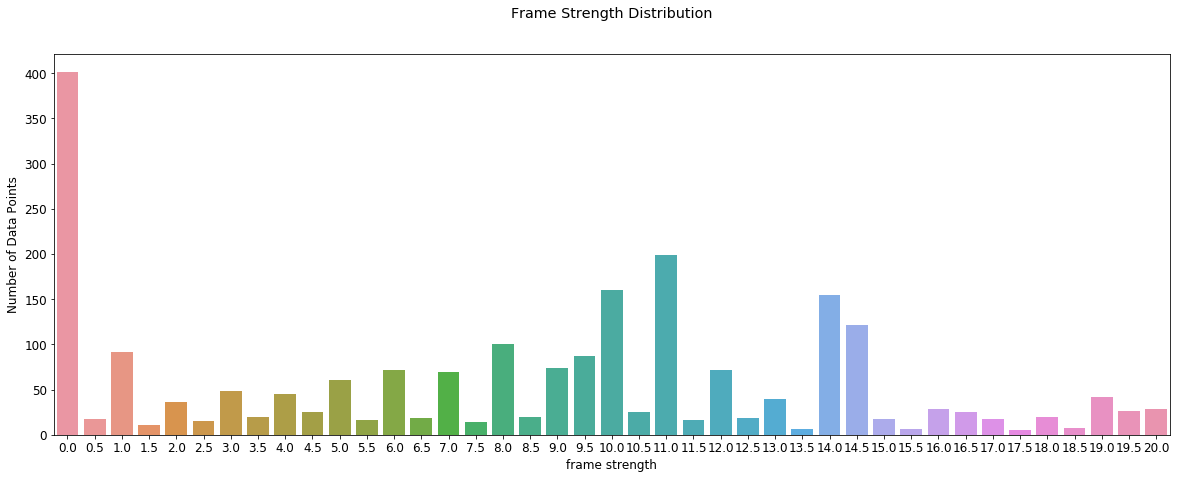

In [25]:
from matplotlib import rcParams
rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(20,7))
sns.barplot(x='frame strength', y='bin_num', data=fsbin_grp)
plt.title('Frame Strength Distribution', y=1.08);
plt.ylabel('Number of Data Points')

### Create feature importance dictionary

In [26]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Linear Regression

#### Grid Search

In [27]:
from sklearn.linear_model import LinearRegression

stdscl = StandardScaler()
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)
X_train1_std = stdscl.fit_transform(X_train1)
X_cv_std = stdscl.transform(X_cv)

linreg = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

n_jobs = 4 
regressor = GridSearchCV(estimator=linreg, cv=None, param_grid=param_grid, n_jobs=n_jobs)
best_est = regressor.fit(X_train1_std, y_train1)
print(regressor.best_estimator_)

print("Best Estimator Parameters")
print("---------------------------")
print(f"fit_intercept: {regressor.best_params_['fit_intercept']}")
print 
print(f"Train R-squared: {regressor.score(X_cv_std, y_cv)}")

/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Best Estimator Parameters
---------------------------
fit_intercept: True


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<function print>

Train R-squared: 0.5991931939445533


#### K-fold Cross-validation on test set

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

X_test_pred_all_lr = pd.DataFrame()
rsq_list = []
adj_rsq_list = []
mae_list = []
rmse_list = []
print("rsq  adj-rsq  mae  rmse")
kfold = KFold(10, True, 1)

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                          normalize=False)
    lr_model = lr.fit(X_train1_std, y_train1)
    lr_predict = lr.predict(X_cv_std)
    rsq = lr.score(X_cv_std, y_cv)
    rsq_list.append(rsq)
    adj_rsq = 1 - (1-rsq)*(len(y_cv)-1)/(len(y_cv)-X_cv_std.shape[1]-1)
    adj_rsq_list.append(adj_rsq)
    mae = mean_absolute_error(y_cv, lr_predict)
    mae_list.append(mae)
    rmse = sqrt(mean_squared_error(y_cv, lr_predict))
    rmse_list.append(rmse)
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))
    
    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = X_train.iloc[test_index].copy()
    X_test_pred.reset_index(inplace=True)
    df_y_test_hs = pd.DataFrame({'y_actual': y_train.iloc[test_index]})
    df_y_test_hs.reset_index(inplace=True)
    X_test_pred['y_actual'] = df_y_test_hs['y_actual'].values
    X_test_pred['y_pred'] = lr_predict
    X_test_pred['frame_diff'] = X_test_pred['y_actual'] - X_test_pred['y_pred']
    X_test_pred['abs_frame_diff'] = abs(X_test_pred['y_actual'] - X_test_pred['y_pred'])
    X_test_pred_all_lr = X_test_pred_all_lr.append(X_test_pred)    
    
ranks["LinReg"] = ranking(np.abs(lr.coef_), features)

rsq  adj-rsq  mae  rmse
0.607 0.158 2.867 3.585
0.691 0.337 2.411 3.151
0.662 0.276 2.609 3.405
0.496 -0.08 2.987 3.97
0.581 0.097 2.756 3.743
0.685 0.32 2.38 3.138
0.609 0.157 2.81 3.737
0.587 0.11 2.87 3.767
0.545 0.021 2.674 3.631
0.641 0.227 2.666 3.541


#### Reporting average performance metrics

In [29]:
print(f"Mean R-squared for 10 Iterations          : {np.array(rsq_list).mean():1.5}")
print(f"Mean Adjusted R-squared for 10 Iterations : {np.array(adj_rsq_list).mean():1.5}")
print(f"Mean MAE for 10 Iterations                : {np.array(mae_list).mean():1.5} frames")
print(f"Mean RMSE for 10 Iterations               : {np.array(rmse_list).mean():1.5} frames")

# Mean difference for incorrect predictions
lr_diff = X_test_pred_all_lr['y_actual'] - X_test_pred_all_lr['y_pred']
mean_frame_diff = abs(lr_diff[lr_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(lr_diff[lr_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_pred_all_lr[X_test_pred_all_lr['abs_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_lr['abs_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_lr[X_test_pred_all_lr['abs_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_lr['abs_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_lr[X_test_pred_all_lr['abs_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_lr['abs_frame_diff']) * 100)
print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

Mean R-squared for 10 Iterations          : 0.61025
Mean Adjusted R-squared for 10 Iterations : 0.16228
Mean MAE for 10 Iterations                : 2.7032 frames
Mean RMSE for 10 Iterations               : 3.5669 frames

Mean difference for Incorrect Predictions:   3.1 frames
Median difference for Incorrect Predictions: 2.6 frames

% Predictions Within 1 Frame         : 33.39%
% Predictions Within 2 Frames        : 52.96%
% Predictions Within 3 Frames        : 67.49%


Min Diff: -16.666143351903592, Max Diff: 13.345703222858287


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

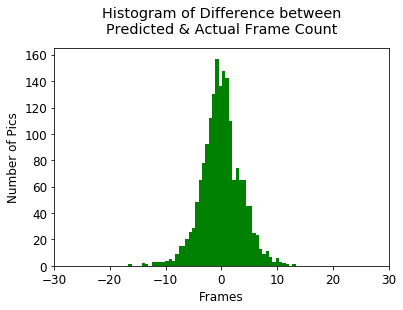

In [30]:
print(f"Min Diff: {X_test_pred_all_lr['frame_diff'].min()}, Max Diff: {X_test_pred_all_lr['frame_diff'].max()}")
(X_test_pred_all_lr['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

### Checking binned frame error

In [31]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_pred_all_lr['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_pred_all_lr['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_pred_all_lr['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_pred_all_lr['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_pred_all_lr['binned_frame_diff'] = X_test_pred_all_lr['y_actual_binned'] - \
                                            X_test_pred_all_lr['y_pred_binned']
X_test_pred_all_lr['abs_binned_frame_diff'] = abs(X_test_pred_all_lr['binned_frame_diff'])
X_test_pred_all_lr

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        242    460     2.0    0.0    2.0   0.0     0.0    0.0   
1        281    499     2.0    0.0    0.0   0.0     0.0    0.0   
2       1740   3382     2.0    0.0    0.0   0.0     0.0    0.0   
3       1227   2869     2.0    0.0    0.0   0.0     0.0    0.0   
4       2193   3853     2.0    0.0    0.0   0.0     0.0    0.0   
5        134    352     2.0    0.0    0.0   0.0     0.0    0.0   
6       1156   2624     2.0    0.0    1.0   0.0     0.0    0.0   
7       1953   3597     2.0    0.0    0.0   0.0     0.0    0.0   
8       2087   3736     1.0    0.0    1.0   0.0     0.0    0.0   
9        161    379     2.0    0.0    0.0   0.0     0.0    0.0   
10      1285   2927     2.0    0.0    0.0   0.0     0.0    0.0   
11       495    763     2.0    0.0    0.0   0.0     1.0    0.0   
12      1122   2542     2.0    0.0    0.0   0.0     0.0    0.0   
13      1216   2858     2.0    0.0    0.0   0.0     0.0    0.0   
14        72    226     2.0    0.0    1.0   0.0     0.0    0.0   
15      1875   3517     2.0    0.0    0.0   0.0     0.0    0.0   
16      1923   3567     2.0    0.0    0.0   0.0     0.0    0.0   
17       282    500     2.0    0.0    2.0   0.0     0.0    0.0   
18       510    804     2.0    0.0    0.0   0.0     0.0    0.0   
19       461    679     2.0    0.0    0.0   0.0     0.0    0.0   
20      1734   3376     2.0    0.0    0.0   0.0     0.0    0.0   
21      1232   2874     2.0    0.0    0.0   0.0     0.0    0.0   
22      2114   3765     2.0    0.0    0.0   0.0     0.0    0.0   
23      2035   3679     2.0    0.0    0.0   0.0     0.0    0.0   
24      1967   3611     2.0    0.0    0.0   0.0     0.0    0.0   
25      1310   2952     2.0    0.0    0.0   0.0     0.0    0.0   
26       680   1285     2.0    0.0    0.0   0.0     0.0    0.0   
27      2132   3783     2.0    0.0    0.0   0.0     0.0    0.0   
28       354    572     2.0    0.0    0.0   0.0     0.0    0.0   
29       179    397     2.0    0.0    2.0   0.0     0.0    0.0   
..       ...    ...     ...    ...    ...   ...     ...    ...   
152     2100   3749     1.0    0.0    1.0   0.0     0.0    0.0   
153     1476   3118     2.0    0.0    0.0   0.0     0.0    0.0   
154      817   1624     2.0    0.0    0.0   0.0     0.0    0.0   
155     1197   2665     2.0    0.0    0.0   0.0     0.0    0.0   
156      738   1429     1.0    0.0    1.0   0.0     0.0    0.0   
157      330    548     2.0    0.0    0.0   0.0     0.0    0.0   
158     1605   3247     2.0    0.0    0.0   0.0     0.0    0.0   
159     2279   3964     2.0    0.0    0.0   0.0     0.0    0.0   
160      899   1952     2.0    0.0    1.0   0.0     1.0    0.0   
161      486    725     2.0    0.0    0.0   0.0     0.0    0.0   
162      355    573     2.0    0.0    2.0   0.0     0.0    0.0   
163     1423   3065     2.0    0.0    0.0   0.0     0.0    0.0   
164      781   1537     1.0    0.0    1.0   0.0     0.0    0.0   
165     1751   3393     2.0    0.0    0.0   0.0     0.0    0.0   
166     2194   3854     2.0    0.0    0.0   0.0     0.0    0.0   
167      730   1409     1.0    0.0    1.0   0.0     0.0    0.0   
168      874   1824     1.0    0.0    1.0   0.0     0.0    0.0   
169     2217   3881     2.0    0.0    0.0   0.0     0.0    0.0   
170      373    591     2.0    0.0    0.0   0.0     0.0    0.0   
171     1912   3555     2.0    0.0    0.0   0.0     0.0    0.0   
172      655   1224     2.0    0.0    0.0   0.0     0.0    0.0   
173      556    977     2.0    0.0    1.0   0.0     1.0    0.0   
174     1275   2917     2.0    0.0    0.0   0.0     0.0    0.0   
175       90    308     2.0    0.0    0.0   0.0     0.0    0.0   
176     2184   3840     2.0    0.0    0.0   0.0     0.0    0.0   
177     1389   3031     2.0    0.0    0.0   0.0     0.0    0.0   
178      749   1456     1.0    0.0    1.0   0.0     0.0    0.0   
179      608   1106     2.0    0.0    0.0   0.0     0.0    0.0   
180      335    553     2.0    0.0    2.0   0

In [32]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_pred_all_lr[X_test_pred_all_lr['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_lr['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_lr[X_test_pred_all_lr['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_lr['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_lr[X_test_pred_all_lr['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_lr['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 37.66%
% Predictions Within 2 Frames        : 54.82%
% Predictions Within 3 Frames        : 69.85%


### Plotting Probability Plot for Residual Error
-> Shows how close to error distribution is to Normal. If the distribution is Normal, then all the residual errors will line up perfectly on the red line

((array([-3.36700779, -3.11419469, -2.97386448, ...,  2.97386448,
          3.11419469,  3.36700779]),
  array([-16.66614335, -14.18217118, -14.18023034, ...,  11.22271271,
          11.89826304,  13.34570322])),
 (3.561164803120534, -0.010905900792234392, 0.9942411996996191))

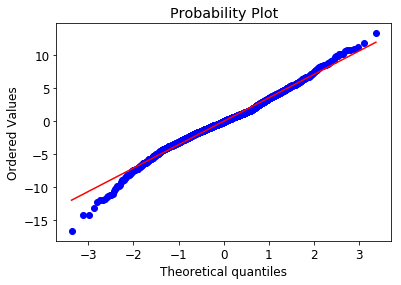

In [33]:
import pylab 
import scipy.stats as stats

stats.probplot(X_test_pred_all_lr['frame_diff'], dist="norm", plot=pylab)
pylab.show()

### Ridge Regression

#### Grid Search

In [34]:
from sklearn.linear_model import Ridge

# For hyperparameter selection
stdscl = StandardScaler()
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)
X_train1_std = stdscl.fit_transform(X_train1)
X_cv_std = stdscl.transform(X_cv)

rid = Ridge()
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01],
              'max_iter': [100, 1000],
              'tol': [0.0001, 0.001, 0.01],
              'solver': ['svd', 'lsqr', 'sparse_cg', 'sag', 'saga']}

n_jobs = 4 
regressor = GridSearchCV(estimator=rid, cv=None, param_grid=param_grid, n_jobs=n_jobs)
best_est = regressor.fit(X_train1_std, y_train1)
print(regressor.best_estimator_)

print("Best Estimator Parameters")
print("---------------------------")
print(f"alpha: {regressor.best_params_['alpha']}")
print(f"max_iter: {regressor.best_params_['max_iter']}")
print(f"tol: {regressor.best_params_['tol']}")
print(f"solver: {regressor.best_params_['solver']}")
print 
print(f"Train R-squared: {regressor.score(X_cv_std, y_cv)}")

/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, random_state=None, solver='sag', tol=0.001)
Best Estimator Parameters
---------------------------
alpha: 0.001
max_iter: 100
tol: 0.001
solver: sag


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<function print>

Train R-squared: 0.5197154127488468


#### K-fold Cross-validation on test set

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

X_test_pred_all_rid = pd.DataFrame()
rsq_list = []
adj_rsq_list = []
mae_list = []
rmse_list = []
print("rsq  adj-rsq  mae  rmse")
kfold = KFold(10, True, 1)

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]
    
    rid = Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100,
                normalize=False, random_state=None, solver='sag', tol=0.001)
    rid_model = rid.fit(X_train1_std, y_train1)
    rid_predict = rid.predict(X_cv_std)
    rsq = rid.score(X_cv_std, y_cv)
    rsq_list.append(rsq)
    adj_rsq = 1 - (1-rsq)*(len(y_cv)-1)/(len(y_cv)-X_cv_std.shape[1]-1)
    adj_rsq_list.append(adj_rsq)
    mae = mean_absolute_error(y_cv, rid_predict)
    mae_list.append(mae)
    rmse = sqrt(mean_squared_error(y_cv, rid_predict))
    rmse_list.append(rmse)
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = X_train.iloc[test_index].copy()
    X_test_pred.reset_index(inplace=True)
    df_y_test_hs = pd.DataFrame({'y_actual': y_train.iloc[test_index]})
    df_y_test_hs.reset_index(inplace=True)
    X_test_pred['y_actual'] = df_y_test_hs['y_actual'].values
    X_test_pred['y_pred'] = rid_predict
    X_test_pred['frame_diff'] = X_test_pred['y_actual'] - X_test_pred['y_pred']
    X_test_pred['abs_frame_diff'] = abs(X_test_pred['y_actual'] - X_test_pred['y_pred'])
    X_test_pred_all_rid = X_test_pred_all_rid.append(X_test_pred)    
    
ranks['Ridge'] = ranking(np.abs(rid.coef_), features)

rsq  adj-rsq  mae  rmse
0.505 -0.06 3.265 4.023


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.651 0.253 2.648 3.347


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.593 0.128 3.071 3.737


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.444 -0.191 3.242 4.168


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.535 -0.002 2.956 3.942


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.597 0.132 2.867 3.548


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.53 -0.013 3.168 4.097
0.513 -0.049 3.072 4.091


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.541 0.011 2.891 3.649
0.595 0.128 2.892 3.762


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### Reporting average performance metrics

In [36]:
print(f"Mean R-squared for 10 Iterations          : {np.array(rsq_list).mean():1.5}")
print(f"Mean Adjusted R-squared for 10 Iterations : {np.array(adj_rsq_list).mean():1.5}")
print(f"Mean MAE for 10 Iterations                : {np.array(mae_list).mean():1.5} frames")
print(f"Mean RMSE for 10 Iterations               : {np.array(rmse_list).mean():1.5} frames")

# Mean difference for incorrect predictions
rid_diff = X_test_pred_all_rid['y_actual'] - X_test_pred_all_rid['y_pred']
mean_frame_diff = abs(rid_diff[rid_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(rid_diff[rid_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_pred_all_rid[X_test_pred_all_rid['abs_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_rid['abs_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_rid[X_test_pred_all_rid['abs_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_rid['abs_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_rid[X_test_pred_all_rid['abs_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_rid['abs_frame_diff']) * 100)

print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

Mean R-squared for 10 Iterations          : 0.55033
Mean Adjusted R-squared for 10 Iterations : 0.033531
Mean MAE for 10 Iterations                : 3.0072 frames
Mean RMSE for 10 Iterations               : 3.8362 frames

Mean difference for Incorrect Predictions:   3.2 frames
Median difference for Incorrect Predictions: 2.7 frames

% Predictions Within 1 Frame         : 25.49%
% Predictions Within 2 Frames        : 44.90%
% Predictions Within 3 Frames        : 61.62%


Min Diff: -20.515203590320496, Max Diff: 11.05677017203247


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

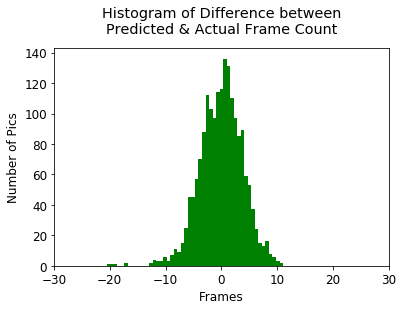

In [37]:
print(f"Min Diff: {X_test_pred_all_rid['frame_diff'].min()}, Max Diff: {X_test_pred_all_rid['frame_diff'].max()}")
(X_test_pred_all_rid['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

### Checking binned frame error

In [38]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_pred_all_rid['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_pred_all_rid['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_pred_all_rid['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_pred_all_rid['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_pred_all_rid['binned_frame_diff'] = X_test_pred_all_rid['y_actual_binned'] - \
                                            X_test_pred_all_rid['y_pred_binned']
X_test_pred_all_rid['abs_binned_frame_diff'] = abs(X_test_pred_all_rid['binned_frame_diff'])
X_test_pred_all_rid

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        242    460     2.0    0.0    2.0   0.0     0.0    0.0   
1        281    499     2.0    0.0    0.0   0.0     0.0    0.0   
2       1740   3382     2.0    0.0    0.0   0.0     0.0    0.0   
3       1227   2869     2.0    0.0    0.0   0.0     0.0    0.0   
4       2193   3853     2.0    0.0    0.0   0.0     0.0    0.0   
5        134    352     2.0    0.0    0.0   0.0     0.0    0.0   
6       1156   2624     2.0    0.0    1.0   0.0     0.0    0.0   
7       1953   3597     2.0    0.0    0.0   0.0     0.0    0.0   
8       2087   3736     1.0    0.0    1.0   0.0     0.0    0.0   
9        161    379     2.0    0.0    0.0   0.0     0.0    0.0   
10      1285   2927     2.0    0.0    0.0   0.0     0.0    0.0   
11       495    763     2.0    0.0    0.0   0.0     1.0    0.0   
12      1122   2542     2.0    0.0    0.0   0.0     0.0    0.0   
13      1216   2858     2.0    0.0    0.0   0.0     0.0    0.0   
14        72    226     2.0    0.0    1.0   0.0     0.0    0.0   
15      1875   3517     2.0    0.0    0.0   0.0     0.0    0.0   
16      1923   3567     2.0    0.0    0.0   0.0     0.0    0.0   
17       282    500     2.0    0.0    2.0   0.0     0.0    0.0   
18       510    804     2.0    0.0    0.0   0.0     0.0    0.0   
19       461    679     2.0    0.0    0.0   0.0     0.0    0.0   
20      1734   3376     2.0    0.0    0.0   0.0     0.0    0.0   
21      1232   2874     2.0    0.0    0.0   0.0     0.0    0.0   
22      2114   3765     2.0    0.0    0.0   0.0     0.0    0.0   
23      2035   3679     2.0    0.0    0.0   0.0     0.0    0.0   
24      1967   3611     2.0    0.0    0.0   0.0     0.0    0.0   
25      1310   2952     2.0    0.0    0.0   0.0     0.0    0.0   
26       680   1285     2.0    0.0    0.0   0.0     0.0    0.0   
27      2132   3783     2.0    0.0    0.0   0.0     0.0    0.0   
28       354    572     2.0    0.0    0.0   0.0     0.0    0.0   
29       179    397     2.0    0.0    2.0   0.0     0.0    0.0   
..       ...    ...     ...    ...    ...   ...     ...    ...   
152     2100   3749     1.0    0.0    1.0   0.0     0.0    0.0   
153     1476   3118     2.0    0.0    0.0   0.0     0.0    0.0   
154      817   1624     2.0    0.0    0.0   0.0     0.0    0.0   
155     1197   2665     2.0    0.0    0.0   0.0     0.0    0.0   
156      738   1429     1.0    0.0    1.0   0.0     0.0    0.0   
157      330    548     2.0    0.0    0.0   0.0     0.0    0.0   
158     1605   3247     2.0    0.0    0.0   0.0     0.0    0.0   
159     2279   3964     2.0    0.0    0.0   0.0     0.0    0.0   
160      899   1952     2.0    0.0    1.0   0.0     1.0    0.0   
161      486    725     2.0    0.0    0.0   0.0     0.0    0.0   
162      355    573     2.0    0.0    2.0   0.0     0.0    0.0   
163     1423   3065     2.0    0.0    0.0   0.0     0.0    0.0   
164      781   1537     1.0    0.0    1.0   0.0     0.0    0.0   
165     1751   3393     2.0    0.0    0.0   0.0     0.0    0.0   
166     2194   3854     2.0    0.0    0.0   0.0     0.0    0.0   
167      730   1409     1.0    0.0    1.0   0.0     0.0    0.0   
168      874   1824     1.0    0.0    1.0   0.0     0.0    0.0   
169     2217   3881     2.0    0.0    0.0   0.0     0.0    0.0   
170      373    591     2.0    0.0    0.0   0.0     0.0    0.0   
171     1912   3555     2.0    0.0    0.0   0.0     0.0    0.0   
172      655   1224     2.0    0.0    0.0   0.0     0.0    0.0   
173      556    977     2.0    0.0    1.0   0.0     1.0    0.0   
174     1275   2917     2.0    0.0    0.0   0.0     0.0    0.0   
175       90    308     2.0    0.0    0.0   0.0     0.0    0.0   
176     2184   3840     2.0    0.0    0.0   0.0     0.0    0.0   
177     1389   3031     2.0    0.0    0.0   0.0     0.0    0.0   
178      749   1456     1.0    0.0    1.0   0.0     0.0    0.0   
179      608   1106     2.0    0.0    0.0   0.0     0.0    0.0   
180      335    553     2.0    0.0    2.0   0

In [39]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_pred_all_rid[X_test_pred_all_rid['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_rid['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_rid[X_test_pred_all_rid['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_rid['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_rid[X_test_pred_all_rid['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_rid['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 30.48%
% Predictions Within 2 Frames        : 48.68%
% Predictions Within 3 Frames        : 64.64%


### Plotting Probability Plot for Residual Error
-> Shows how close to error distribution is to Normal. If the distribution is Normal, then all the residual errors will line up perfectly on the red line


((array([-3.36700779, -3.11419469, -2.97386448, ...,  2.97386448,
          3.11419469,  3.36700779]),
  array([-20.51520359, -19.83960682, -18.88490457, ...,  10.28307293,
          10.60571548,  11.05677017])),
 (3.8243958041306056, -0.01424255633258538, 0.9930598570242068))

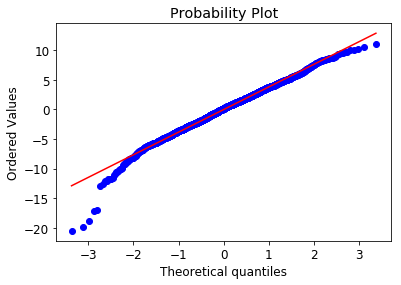

In [40]:
import pylab 
import scipy.stats as stats

stats.probplot(X_test_pred_all_rid['frame_diff'], dist="norm", plot=pylab)
pylab.show()

### Lasso Regression

#### Grid Search

In [41]:
from sklearn.linear_model import Lasso


# For hyperparameter selection
stdscl = StandardScaler()
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)
X_train1_std = stdscl.fit_transform(X_train1)
X_cv_std = stdscl.transform(X_cv)

las = Lasso()
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01],
              'max_iter': [100, 1000],
              'tol': [0.0001, 0.001, 0.01]}

n_jobs = 4 
regressor = GridSearchCV(estimator=las, cv=None, param_grid=param_grid, n_jobs=n_jobs)
best_est = regressor.fit(X_train1_std, y_train1)
print(regressor.best_estimator_)

print("Best Estimator Parameters")
print("---------------------------")
print(f"alpha: {regressor.best_params_['alpha']}")
print(f"max_iter: {regressor.best_params_['max_iter']}")
print(f"tol: {regressor.best_params_['tol']}")
print 
print(f"Train R-squared: {regressor.score(X_cv_std, y_cv)}")

/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best Estimator Parameters
---------------------------
alpha: 0.01
max_iter: 1000
tol: 0.0001


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<function print>

Train R-squared: 0.5112807449733917


#### K-fold Cross-validation on test set

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

X_test_pred_all_las = pd.DataFrame()
rsq_list = []
adj_rsq_list = []
mae_list = []
rmse_list = []
print("rsq  adj-rsq  mae  rmse")
kfold = KFold(10, True, 1)

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]
    
    las = Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
                normalize=False, positive=False, precompute=False, random_state=None,
                selection='cyclic', tol=0.0001, warm_start=False)
    las_model = las.fit(X_train1_std, y_train1)
    las_predict = las.predict(X_cv_std)
    rsq = las.score(X_cv_std, y_cv)
    rsq_list.append(rsq)
    adj_rsq =  1 - (1-rsq)*(len(y_cv)-1)/(len(y_cv)-X_cv_std.shape[1]-1)
    adj_rsq_list.append(adj_rsq)
    mae = mean_absolute_error(y_cv, las_predict)
    mae_list.append(mae)
    rmse = sqrt(mean_squared_error(y_cv, las_predict))
    rmse_list.append(rmse)
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = X_train.iloc[test_index].copy()
    X_test_pred.reset_index(inplace=True)
    df_y_test_hs = pd.DataFrame({'y_actual': y_train.iloc[test_index]})
    df_y_test_hs.reset_index(inplace=True)
    X_test_pred['y_actual'] = df_y_test_hs['y_actual'].values
    X_test_pred['y_pred'] = las_predict
    X_test_pred['frame_diff'] = X_test_pred['y_actual'] - X_test_pred['y_pred']
    X_test_pred['abs_frame_diff'] = abs(X_test_pred['y_actual'] - X_test_pred['y_pred'])
    X_test_pred_all_las = X_test_pred_all_las.append(X_test_pred)

ranks["Lasso"] = ranking(np.abs(las.coef_), features)

rsq  adj-rsq  mae  rmse
0.533 -0.0 3.174 3.907


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.654 0.259 2.641 3.331
0.622 0.191 2.934 3.598


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.469 -0.137 3.173 4.073
0.56 0.051 2.887 3.837


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.623 0.188 2.766 3.43
0.594 0.124 3.053 3.809


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.547 0.024 2.994 3.946


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.562 0.055 2.819 3.566
0.607 0.152 2.866 3.708


/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### Reporting average performance metrics

In [43]:
print(f"Mean R-squared for 10 Iterations          : {np.array(rsq_list).mean():1.5}")
print(f"Mean Adjusted R-squared for 10 Iterations : {np.array(adj_rsq_list).mean():1.5}")
print(f"Mean MAE for 10 Iterations                : {np.array(mae_list).mean():1.5} frames")
print(f"Mean RMSE for 10 Iterations               : {np.array(rmse_list).mean():1.5} frames")

# Mean difference for incorrect predictions
las_diff = X_test_pred_all_las['y_actual'] - X_test_pred_all_las['y_pred']
mean_frame_diff = abs(las_diff[las_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(las_diff[las_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_pred_all_las[X_test_pred_all_las['abs_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_las['abs_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_las[X_test_pred_all_las['abs_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_las['abs_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_las[X_test_pred_all_las['abs_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_las['abs_frame_diff']) * 100)

print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

Mean R-squared for 10 Iterations          : 0.577
Mean Adjusted R-squared for 10 Iterations : 0.090879
Mean MAE for 10 Iterations                : 2.9308 frames
Mean RMSE for 10 Iterations               : 3.7205 frames

Mean difference for Incorrect Predictions:   3.1 frames
Median difference for Incorrect Predictions: 2.7 frames

% Predictions Within 1 Frame         : 26.32%
% Predictions Within 2 Frames        : 46.22%
% Predictions Within 3 Frames        : 63.87%


Min Diff: -18.13329366727239, Max Diff: 10.558250245249408


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

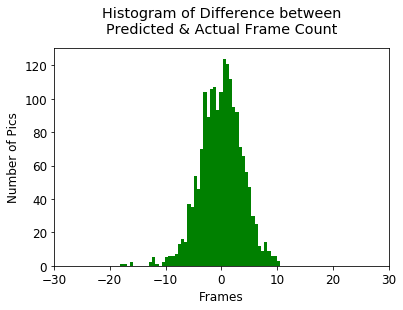

In [44]:
print(f"Min Diff: {X_test_pred_all_las['frame_diff'].min()}, Max Diff: {X_test_pred_all_las['frame_diff'].max()}")
(X_test_pred_all_las['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

### Checking binned frame error

In [45]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_pred_all_las['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_pred_all_las['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_pred_all_las['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_pred_all_las['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_pred_all_las['binned_frame_diff'] = X_test_pred_all_las['y_actual_binned'] - \
                                            X_test_pred_all_las['y_pred_binned']
X_test_pred_all_las['abs_binned_frame_diff'] = abs(X_test_pred_all_las['binned_frame_diff'])
X_test_pred_all_las

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        242    460     2.0    0.0    2.0   0.0     0.0    0.0   
1        281    499     2.0    0.0    0.0   0.0     0.0    0.0   
2       1740   3382     2.0    0.0    0.0   0.0     0.0    0.0   
3       1227   2869     2.0    0.0    0.0   0.0     0.0    0.0   
4       2193   3853     2.0    0.0    0.0   0.0     0.0    0.0   
5        134    352     2.0    0.0    0.0   0.0     0.0    0.0   
6       1156   2624     2.0    0.0    1.0   0.0     0.0    0.0   
7       1953   3597     2.0    0.0    0.0   0.0     0.0    0.0   
8       2087   3736     1.0    0.0    1.0   0.0     0.0    0.0   
9        161    379     2.0    0.0    0.0   0.0     0.0    0.0   
10      1285   2927     2.0    0.0    0.0   0.0     0.0    0.0   
11       495    763     2.0    0.0    0.0   0.0     1.0    0.0   
12      1122   2542     2.0    0.0    0.0   0.0     0.0    0.0   
13      1216   2858     2.0    0.0    0.0   0.0     0.0    0.0   
14        72    226     2.0    0.0    1.0   0.0     0.0    0.0   
15      1875   3517     2.0    0.0    0.0   0.0     0.0    0.0   
16      1923   3567     2.0    0.0    0.0   0.0     0.0    0.0   
17       282    500     2.0    0.0    2.0   0.0     0.0    0.0   
18       510    804     2.0    0.0    0.0   0.0     0.0    0.0   
19       461    679     2.0    0.0    0.0   0.0     0.0    0.0   
20      1734   3376     2.0    0.0    0.0   0.0     0.0    0.0   
21      1232   2874     2.0    0.0    0.0   0.0     0.0    0.0   
22      2114   3765     2.0    0.0    0.0   0.0     0.0    0.0   
23      2035   3679     2.0    0.0    0.0   0.0     0.0    0.0   
24      1967   3611     2.0    0.0    0.0   0.0     0.0    0.0   
25      1310   2952     2.0    0.0    0.0   0.0     0.0    0.0   
26       680   1285     2.0    0.0    0.0   0.0     0.0    0.0   
27      2132   3783     2.0    0.0    0.0   0.0     0.0    0.0   
28       354    572     2.0    0.0    0.0   0.0     0.0    0.0   
29       179    397     2.0    0.0    2.0   0.0     0.0    0.0   
..       ...    ...     ...    ...    ...   ...     ...    ...   
152     2100   3749     1.0    0.0    1.0   0.0     0.0    0.0   
153     1476   3118     2.0    0.0    0.0   0.0     0.0    0.0   
154      817   1624     2.0    0.0    0.0   0.0     0.0    0.0   
155     1197   2665     2.0    0.0    0.0   0.0     0.0    0.0   
156      738   1429     1.0    0.0    1.0   0.0     0.0    0.0   
157      330    548     2.0    0.0    0.0   0.0     0.0    0.0   
158     1605   3247     2.0    0.0    0.0   0.0     0.0    0.0   
159     2279   3964     2.0    0.0    0.0   0.0     0.0    0.0   
160      899   1952     2.0    0.0    1.0   0.0     1.0    0.0   
161      486    725     2.0    0.0    0.0   0.0     0.0    0.0   
162      355    573     2.0    0.0    2.0   0.0     0.0    0.0   
163     1423   3065     2.0    0.0    0.0   0.0     0.0    0.0   
164      781   1537     1.0    0.0    1.0   0.0     0.0    0.0   
165     1751   3393     2.0    0.0    0.0   0.0     0.0    0.0   
166     2194   3854     2.0    0.0    0.0   0.0     0.0    0.0   
167      730   1409     1.0    0.0    1.0   0.0     0.0    0.0   
168      874   1824     1.0    0.0    1.0   0.0     0.0    0.0   
169     2217   3881     2.0    0.0    0.0   0.0     0.0    0.0   
170      373    591     2.0    0.0    0.0   0.0     0.0    0.0   
171     1912   3555     2.0    0.0    0.0   0.0     0.0    0.0   
172      655   1224     2.0    0.0    0.0   0.0     0.0    0.0   
173      556    977     2.0    0.0    1.0   0.0     1.0    0.0   
174     1275   2917     2.0    0.0    0.0   0.0     0.0    0.0   
175       90    308     2.0    0.0    0.0   0.0     0.0    0.0   
176     2184   3840     2.0    0.0    0.0   0.0     0.0    0.0   
177     1389   3031     2.0    0.0    0.0   0.0     0.0    0.0   
178      749   1456     1.0    0.0    1.0   0.0     0.0    0.0   
179      608   1106     2.0    0.0    0.0   0.0     0.0    0.0   
180      335    553     2.0    0.0    2.0   0

In [46]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_pred_all_las[X_test_pred_all_las['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_las['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_las[X_test_pred_all_las['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_las['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_las[X_test_pred_all_las['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_las['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 30.92%
% Predictions Within 2 Frames        : 49.62%
% Predictions Within 3 Frames        : 66.78%


### Plotting Probability Plot for Residual Error
-> Shows how close to error distribution is to Normal. If the distribution is Normal, then all the residual errors will line up perfectly on the red line


((array([-3.36700779, -3.11419469, -2.97386448, ...,  2.97386448,
          3.11419469,  3.36700779]),
  array([-18.13329367, -17.18067797, -16.34718441, ...,  10.00006049,
          10.37659754,  10.55825025])),
 (3.7170792351854547, -0.007894839696139178, 0.9956275885120078))

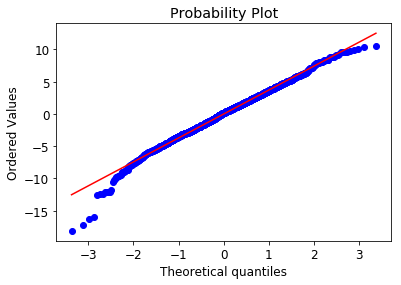

In [47]:
import pylab 
import scipy.stats as stats

stats.probplot(X_test_pred_all_las['frame_diff'], dist="norm", plot=pylab)
pylab.show()

### Decision Tree Regressor

#### Grid Search

In [48]:
from sklearn.tree import DecisionTreeRegressor

# For hyperparameter selection
stdscl = StandardScaler()
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)

dtr = DecisionTreeRegressor()
param_grid = {'splitter': ['best', 'random'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 10, 15],
              'max_features' : ['auto', 'sqrt']}

n_jobs = 4 
regressor = GridSearchCV(estimator=dtr, cv=None, param_grid=param_grid, n_jobs=n_jobs)
best_est = regressor.fit(X_train1, y_train1)
print(regressor.best_estimator_)

print("Best Estimator Parameters")
print("---------------------------")
print(f"splitter: {regressor.best_params_['splitter']}")
print(f"max_depth: {regressor.best_params_['max_depth']}")
print(f"min_samples_split: {regressor.best_params_['min_samples_split']}")
print(f"min_samples_leaf: {regressor.best_params_['min_samples_leaf']}")
print(f"max_features: {regressor.best_params_['max_features']}")
print 
print(f"R-squared: {regressor.score(X_cv, y_cv)}")

/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Best Estimator Parameters
---------------------------
splitter: best
max_depth: 7
min_samples_split: 2
min_samples_leaf: 1
max_features: auto


<function print>

R-squared: 0.6660333676339615


#### K-fold Cross-validation on test set

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

X_test_pred_all_dt = pd.DataFrame()
rsq_list = []
adj_rsq_list = []
mae_list = []
rmse_list = []
print("rsq  adj-rsq  mae  rmse")
kfold = KFold(10, True, 1)

for train_index, test_index in kfold.split(X_train): 
    X_train1 = X_train.iloc[train_index][features]
    X_cv = X_train.iloc[test_index][features]
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    dtree = DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
                                  max_leaf_nodes=None, min_impurity_decrease=0.0,
                                  min_impurity_split=None, min_samples_leaf=1,
                                  min_samples_split=2, min_weight_fraction_leaf=0.0,
                                  presort=False, random_state=None, splitter='best')
    dtree_model = dtree.fit(X_train1, y_train1)
    dtree_predict = dtree.predict(X_cv)
    rsq = dtree.score(X_cv, y_cv)
    rsq_list.append(rsq)
    adj_rsq = 1 - (1-rsq)*(len(y_cv)-1)/(len(y_cv)-X_cv.shape[1]-1)
    adj_rsq_list.append(adj_rsq)
    mae = mean_absolute_error(y_cv, dtree_predict)
    mae_list.append(mae)
    rmse = sqrt(mean_squared_error(y_cv, dtree_predict))
    rmse_list.append(rmse)
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))
    
    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = X_train.iloc[test_index].copy()
    X_test_pred.reset_index(inplace=True)
    df_y_test_hs = pd.DataFrame({'y_actual': y_train.iloc[test_index]})
    df_y_test_hs.reset_index(inplace=True)
    X_test_pred['y_actual'] = df_y_test_hs['y_actual'].values
    X_test_pred['y_pred'] = dtree_predict
    X_test_pred['frame_diff'] = X_test_pred['y_actual'] - X_test_pred['y_pred']
    X_test_pred['abs_frame_diff'] = abs(X_test_pred['y_actual'] - X_test_pred['y_pred'])
    X_test_pred_all_dt = X_test_pred_all_dt.append(X_test_pred)    

ranks["DTree"] = ranking(dtree.feature_importances_, features);

rsq  adj-rsq  mae  rmse
0.612 0.17 2.334 3.559
0.779 0.527 1.775 2.661
0.748 0.46 1.901 2.94
0.642 0.233 2.239 3.345
0.699 0.352 2.016 3.17
0.737 0.433 1.822 2.866
0.723 0.403 1.973 3.144
0.693 0.338 2.145 3.249
0.688 0.328 1.934 3.008
0.666 0.281 2.217 3.415


#### Reporting average performance metrics

In [50]:
print(f"Mean R-squared for 10 Iterations          : {np.array(rsq_list).mean():1.5}")
print(f"Mean Adjusted R-squared for 10 Iterations : {np.array(adj_rsq_list).mean():1.5}")
print(f"Mean MAE for 10 Iterations                : {np.array(mae_list).mean():1.5} frames")
print(f"Mean RMSE for 10 Iterations               : {np.array(rmse_list).mean():1.5} frames")

# Mean difference for incorrect predictions
dt_diff = X_test_pred_all_dt['y_actual'] - X_test_pred_all_dt['y_pred']
mean_frame_diff = abs(dt_diff[dt_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(dt_diff[dt_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_pred_all_dt[X_test_pred_all_dt['abs_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_dt['abs_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_dt[X_test_pred_all_dt['abs_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_dt['abs_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_dt[X_test_pred_all_dt['abs_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_dt['abs_frame_diff']) * 100)
print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

Mean R-squared for 10 Iterations          : 0.69882
Mean Adjusted R-squared for 10 Iterations : 0.35269
Mean MAE for 10 Iterations                : 2.0357 frames
Mean RMSE for 10 Iterations               : 3.1356 frames

Mean difference for Incorrect Predictions:   3.2 frames
Median difference for Incorrect Predictions: 2.7 frames

% Predictions Within 1 Frame         : 53.34%
% Predictions Within 2 Frames        : 65.84%
% Predictions Within 3 Frames        : 75.55%


Min Diff: -11.67, Max Diff: 11.861268292682926


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

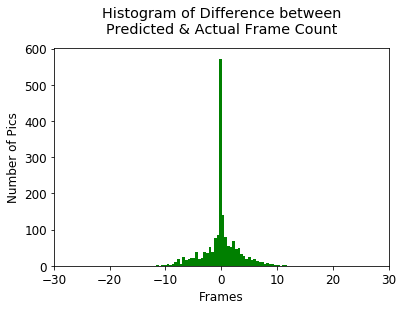

In [51]:
print(f"Min Diff: {X_test_pred_all_dt['frame_diff'].min()}, Max Diff: {X_test_pred_all_dt['frame_diff'].max()}")
(X_test_pred_all_dt['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

## Checking binned frame error

In [52]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_pred_all_dt['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_pred_all_dt['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_pred_all_dt['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_pred_all_dt['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_pred_all_dt['binned_frame_diff'] = X_test_pred_all_dt['y_actual_binned'] - \
                                            X_test_pred_all_dt['y_pred_binned']
X_test_pred_all_dt['abs_binned_frame_diff'] = abs(X_test_pred_all_dt['binned_frame_diff'])
X_test_pred_all_dt

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        242    460     2.0    0.0    2.0   0.0     0.0    0.0   
1        281    499     2.0    0.0    0.0   0.0     0.0    0.0   
2       1740   3382     2.0    0.0    0.0   0.0     0.0    0.0   
3       1227   2869     2.0    0.0    0.0   0.0     0.0    0.0   
4       2193   3853     2.0    0.0    0.0   0.0     0.0    0.0   
5        134    352     2.0    0.0    0.0   0.0     0.0    0.0   
6       1156   2624     2.0    0.0    1.0   0.0     0.0    0.0   
7       1953   3597     2.0    0.0    0.0   0.0     0.0    0.0   
8       2087   3736     1.0    0.0    1.0   0.0     0.0    0.0   
9        161    379     2.0    0.0    0.0   0.0     0.0    0.0   
10      1285   2927     2.0    0.0    0.0   0.0     0.0    0.0   
11       495    763     2.0    0.0    0.0   0.0     1.0    0.0   
12      1122   2542     2.0    0.0    0.0   0.0     0.0    0.0   
13      1216   2858     2.0    0.0    0.0   0.0     0.0    0.0   
14        72    226     2.0    0.0    1.0   0.0     0.0    0.0   
15      1875   3517     2.0    0.0    0.0   0.0     0.0    0.0   
16      1923   3567     2.0    0.0    0.0   0.0     0.0    0.0   
17       282    500     2.0    0.0    2.0   0.0     0.0    0.0   
18       510    804     2.0    0.0    0.0   0.0     0.0    0.0   
19       461    679     2.0    0.0    0.0   0.0     0.0    0.0   
20      1734   3376     2.0    0.0    0.0   0.0     0.0    0.0   
21      1232   2874     2.0    0.0    0.0   0.0     0.0    0.0   
22      2114   3765     2.0    0.0    0.0   0.0     0.0    0.0   
23      2035   3679     2.0    0.0    0.0   0.0     0.0    0.0   
24      1967   3611     2.0    0.0    0.0   0.0     0.0    0.0   
25      1310   2952     2.0    0.0    0.0   0.0     0.0    0.0   
26       680   1285     2.0    0.0    0.0   0.0     0.0    0.0   
27      2132   3783     2.0    0.0    0.0   0.0     0.0    0.0   
28       354    572     2.0    0.0    0.0   0.0     0.0    0.0   
29       179    397     2.0    0.0    2.0   0.0     0.0    0.0   
..       ...    ...     ...    ...    ...   ...     ...    ...   
152     2100   3749     1.0    0.0    1.0   0.0     0.0    0.0   
153     1476   3118     2.0    0.0    0.0   0.0     0.0    0.0   
154      817   1624     2.0    0.0    0.0   0.0     0.0    0.0   
155     1197   2665     2.0    0.0    0.0   0.0     0.0    0.0   
156      738   1429     1.0    0.0    1.0   0.0     0.0    0.0   
157      330    548     2.0    0.0    0.0   0.0     0.0    0.0   
158     1605   3247     2.0    0.0    0.0   0.0     0.0    0.0   
159     2279   3964     2.0    0.0    0.0   0.0     0.0    0.0   
160      899   1952     2.0    0.0    1.0   0.0     1.0    0.0   
161      486    725     2.0    0.0    0.0   0.0     0.0    0.0   
162      355    573     2.0    0.0    2.0   0.0     0.0    0.0   
163     1423   3065     2.0    0.0    0.0   0.0     0.0    0.0   
164      781   1537     1.0    0.0    1.0   0.0     0.0    0.0   
165     1751   3393     2.0    0.0    0.0   0.0     0.0    0.0   
166     2194   3854     2.0    0.0    0.0   0.0     0.0    0.0   
167      730   1409     1.0    0.0    1.0   0.0     0.0    0.0   
168      874   1824     1.0    0.0    1.0   0.0     0.0    0.0   
169     2217   3881     2.0    0.0    0.0   0.0     0.0    0.0   
170      373    591     2.0    0.0    0.0   0.0     0.0    0.0   
171     1912   3555     2.0    0.0    0.0   0.0     0.0    0.0   
172      655   1224     2.0    0.0    0.0   0.0     0.0    0.0   
173      556    977     2.0    0.0    1.0   0.0     1.0    0.0   
174     1275   2917     2.0    0.0    0.0   0.0     0.0    0.0   
175       90    308     2.0    0.0    0.0   0.0     0.0    0.0   
176     2184   3840     2.0    0.0    0.0   0.0     0.0    0.0   
177     1389   3031     2.0    0.0    0.0   0.0     0.0    0.0   
178      749   1456     1.0    0.0    1.0   0.0     0.0    0.0   
179      608   1106     2.0    0.0    0.0   0.0     0.0    0.0   
180      335    553     2.0    0.0    2.0   0

In [53]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_pred_all_dt[X_test_pred_all_dt['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_dt['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_dt[X_test_pred_all_dt['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_dt['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_dt[X_test_pred_all_dt['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_dt['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 54.82%
% Predictions Within 2 Frames        : 67.60%
% Predictions Within 3 Frames        : 76.64%


#### Feature Importances

In [54]:
df_featimp = pd.DataFrame([item for item in zip(X.columns, dtree.feature_importances_)], 
                          columns=['feature', 'importance'])
df_featimp.sort_values(by='importance', ascending=False)

feature  importance
81                 std_temp    0.416756
94            windgustdaily    0.244400
66            power_q1_temp    0.086746
90              windbearing    0.068381
13       entropy_mean_32x16    0.034790
85              total boxes    0.021173
43            norm_iqr_temp    0.013792
30                 hive_vol    0.013359
74                 pressure    0.012520
89          visibilitydaily    0.010288
16      entropy_median_16x8    0.008905
42                moonphase    0.007905
8          entropy_max_16x8    0.007533
62           power_iqr_temp    0.006680
25        entropy_std_32x16    0.005562
36                 iqr_temp    0.005200
17     entropy_median_32x16    0.004038
5                  dewpoint    0.003723
55    norm_q1_tempvol_ratio    0.003394
47           norm_mean_temp    0.003268
70     precipintensitydaily    0.002522
51  norm_min_temparea_ratio    0.002514
22          entropy_min_4x2    0.002512
61    norm_q3_tempvol_ratio    0.001814
67            power_q2_temp    0.001490
14         entropy_mean_4x2    0.001074
44            norm_max_temp    0.001033
27          entropy_std_8x4    0.000966
37       iqr_temparea_ratio    0.000924
31                     hour    0.000869
..                      ...         ...
23          entropy_min_8x4    0.000000
21        entropy_min_32x16    0.000000
20         entropy_min_16x8    0.000000
19       entropy_median_8x4    0.000000
12        entropy_mean_16x8    0.000000
58    norm_q2_tempvol_ratio    0.000000
9         entropy_max_32x16    0.000000
7            entropy_allimg    0.000000
6            dewpointddaily    0.000000
4           cloudcoverdaily    0.000000
3                cloudcover    0.000000
2    apparenttemperaturelow    0.000000
28               heat_index    0.000000
29                hive_area    0.000000
32         hrs_from_sunrise    0.000000
33          hrs_from_sunset    0.000000
38        iqr_tempvol_ratio    0.000000
39                 max_temp    0.000000
40                mean_temp    0.000000
41                 min_temp    0.000000
45  norm_max_temparea_ratio    0.000000
1   apparenttemperaturehigh    0.000000
49  norm_mean_tempvol_ratio    0.000000
50            norm_min_temp    0.000000
52   norm_min_tempvol_ratio    0.000000
53             norm_q1_temp    0.000000
54   norm_q1_temparea_ratio    0.000000
56             norm_q2_temp    0.000000
57   norm_q2_temparea_ratio    0.000000
96           windspeeddaily    0.000000

[97 rows x 2 columns]

### Plotting Probability Plot for Residual Error
-> Shows how close to error distribution is to Normal.  If the distribution is Normal, then all the residual errors will line up perfectly on the red line

((array([-3.36700779, -3.11419469, -2.97386448, ...,  2.97386448,
          3.11419469,  3.36700779]),
  array([-11.67      , -10.69103896, -10.3505    , ...,  11.        ,
          11.67      ,  11.86126829])),
 (3.04870026444089, 0.001410257786702439, 0.9674072056462678))

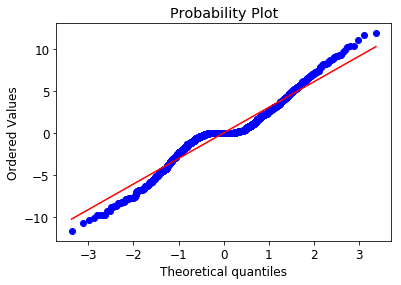

In [55]:
import pylab 
import scipy.stats as stats

stats.probplot(X_test_pred_all_dt['frame_diff'], dist="norm", plot=pylab)
pylab.show()

### Random Forest Regressor

#### Grid Search

In [56]:
from sklearn.ensemble import RandomForestRegressor

# For hyperparameter selection
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)

rfr = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 400],
              'max_features': ['auto', 'sqrt'],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 3, 5]}              
n_jobs = 4 
regressor = GridSearchCV(estimator=rfr, cv=None, param_grid=param_grid, n_jobs=n_jobs)
best_est = regressor.fit(X_train1, y_train1)
print(regressor.best_estimator_)

print("Best Estimator Parameters")
print("---------------------------")
print(f"n_estimators: {regressor.best_params_['n_estimators']}")
print(f"max_features: {regressor.best_params_['max_features']}")
print(f"min_samples_split: {regressor.best_params_['min_samples_split']}")
print(f"min_samples_leaf: {regressor.best_params_['min_samples_leaf']}")
print 
print(f"R-squared: {regressor.score(X_cv, y_cv)}")

/home/griggs/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best Estimator Parameters
---------------------------
n_estimators: 400
max_features: auto
min_samples_split: 2
min_samples_leaf: 1


<function print>

R-squared: 0.7556900771594081


#### K-fold Cross-validation on test set

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

X_test_pred_all_rf = pd.DataFrame()
rsq_list = []
adj_rsq_list = []
mae_list = []
rmse_list = []
print("rsq  adj-rsq  mae  rmse")
kfold = KFold(10, True, 1)

for train_index, test_index in kfold.split(X_train): 
    X_train1 = X_train.iloc[train_index][features]
    X_cv = X_train.iloc[test_index][features]
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    rfm = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                                max_features='auto', max_leaf_nodes=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
                                oob_score=False, random_state=None, verbose=0, warm_start=False)
    rfm_model = rfm.fit(X_train1, y_train1)
    rfm_predict = rfm.predict(X_cv)
    rsq = rfm.score(X_cv, y_cv)
    rsq_list.append(rsq)
    adj_rsq = 1 - (1-rsq)*(len(y_cv)-1)/(len(y_cv)-X_cv.shape[1]-1)
    adj_rsq_list.append(adj_rsq)
    mae = mean_absolute_error(y_cv, rfm_predict)
    mae_list.append(mae)
    rmse = sqrt(mean_squared_error(y_cv, rfm_predict))
    rmse_list.append(rmse)
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = X_train.iloc[test_index].copy()
    X_test_pred.reset_index(inplace=True)
    df_y_test_hs = pd.DataFrame({'y_actual': y_train.iloc[test_index]})
    df_y_test_hs.reset_index(inplace=True)
    X_test_pred['y_actual'] = df_y_test_hs['y_actual'].values
    X_test_pred['y_pred'] = rfm_predict
    X_test_pred['frame_diff'] = X_test_pred['y_actual'] - X_test_pred['y_pred']
    X_test_pred['abs_frame_diff'] = abs(X_test_pred['y_actual'] - X_test_pred['y_pred'])
    X_test_pred_all_rf = X_test_pred_all_rf.append(X_test_pred)    
    
ranks["RF"] = ranking(rfm.feature_importances_, features);

rsq  adj-rsq  mae  rmse
0.743 0.449 1.855 2.9
0.789 0.548 1.665 2.602
0.779 0.526 1.694 2.756
0.723 0.407 1.964 2.942
0.801 0.572 1.614 2.578
0.81 0.591 1.519 2.436
0.786 0.539 1.748 2.763
0.744 0.447 1.893 2.969
0.761 0.485 1.753 2.632
0.755 0.473 1.92 2.923


#### Reporting average performance metrics

In [58]:
print(f"Mean R-squared for 10 Iterations          : {np.array(rsq_list).mean():1.5}")
print(f"Mean Adjusted R-squared for 10 Iterations : {np.array(adj_rsq_list).mean():1.5}")
print(f"Mean MAE for 10 Iterations                : {np.array(mae_list).mean():1.5} frames")
print(f"Mean RMSE for 10 Iterations               : {np.array(rmse_list).mean():1.5} frames")

# Mean difference for incorrect predictions
rfm_diff = X_test_pred_all_rf['y_actual'] - X_test_pred_all_rf['y_pred']

mean_frame_diff = abs(rfm_diff[rfm_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(rfm_diff[rfm_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_pred_all_rf[X_test_pred_all_rf['abs_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_rf['abs_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_rf[X_test_pred_all_rf['abs_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_rf['abs_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_rf[X_test_pred_all_rf['abs_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_rf['abs_frame_diff']) * 100)

print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

Mean R-squared for 10 Iterations          : 0.76905
Mean Adjusted R-squared for 10 Iterations : 0.50367
Mean MAE for 10 Iterations                : 1.7626 frames
Mean RMSE for 10 Iterations               : 2.7501 frames

Mean difference for Incorrect Predictions:   2.8 frames
Median difference for Incorrect Predictions: 2.2 frames

% Predictions Within 1 Frame         : 54.77%
% Predictions Within 2 Frames        : 69.68%
% Predictions Within 3 Frames        : 79.00%


Min Diff: -9.963099999999999, Max Diff: 11.2749325


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

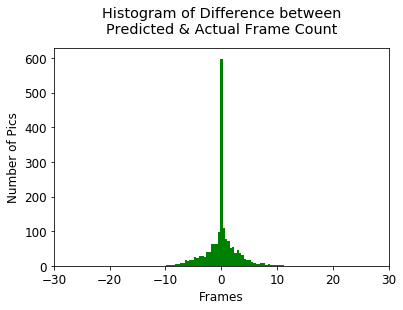

In [59]:
print(f"Min Diff: {X_test_pred_all_rf['frame_diff'].min()}, Max Diff: {X_test_pred_all_rf['frame_diff'].max()}")
(X_test_pred_all_rf['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

### Checking binned frame error

In [60]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_pred_all_rf['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_pred_all_rf['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_pred_all_rf['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_pred_all_rf['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_pred_all_rf['binned_frame_diff'] = X_test_pred_all_rf['y_actual_binned'] - \
                                            X_test_pred_all_rf['y_pred_binned']
X_test_pred_all_rf['abs_binned_frame_diff'] = abs(X_test_pred_all_rf['binned_frame_diff'])
X_test_pred_all_rf

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        242    460     2.0    0.0    2.0   0.0     0.0    0.0   
1        281    499     2.0    0.0    0.0   0.0     0.0    0.0   
2       1740   3382     2.0    0.0    0.0   0.0     0.0    0.0   
3       1227   2869     2.0    0.0    0.0   0.0     0.0    0.0   
4       2193   3853     2.0    0.0    0.0   0.0     0.0    0.0   
5        134    352     2.0    0.0    0.0   0.0     0.0    0.0   
6       1156   2624     2.0    0.0    1.0   0.0     0.0    0.0   
7       1953   3597     2.0    0.0    0.0   0.0     0.0    0.0   
8       2087   3736     1.0    0.0    1.0   0.0     0.0    0.0   
9        161    379     2.0    0.0    0.0   0.0     0.0    0.0   
10      1285   2927     2.0    0.0    0.0   0.0     0.0    0.0   
11       495    763     2.0    0.0    0.0   0.0     1.0    0.0   
12      1122   2542     2.0    0.0    0.0   0.0     0.0    0.0   
13      1216   2858     2.0    0.0    0.0   0.0     0.0    0.0   
14        72    226     2.0    0.0    1.0   0.0     0.0    0.0   
15      1875   3517     2.0    0.0    0.0   0.0     0.0    0.0   
16      1923   3567     2.0    0.0    0.0   0.0     0.0    0.0   
17       282    500     2.0    0.0    2.0   0.0     0.0    0.0   
18       510    804     2.0    0.0    0.0   0.0     0.0    0.0   
19       461    679     2.0    0.0    0.0   0.0     0.0    0.0   
20      1734   3376     2.0    0.0    0.0   0.0     0.0    0.0   
21      1232   2874     2.0    0.0    0.0   0.0     0.0    0.0   
22      2114   3765     2.0    0.0    0.0   0.0     0.0    0.0   
23      2035   3679     2.0    0.0    0.0   0.0     0.0    0.0   
24      1967   3611     2.0    0.0    0.0   0.0     0.0    0.0   
25      1310   2952     2.0    0.0    0.0   0.0     0.0    0.0   
26       680   1285     2.0    0.0    0.0   0.0     0.0    0.0   
27      2132   3783     2.0    0.0    0.0   0.0     0.0    0.0   
28       354    572     2.0    0.0    0.0   0.0     0.0    0.0   
29       179    397     2.0    0.0    2.0   0.0     0.0    0.0   
..       ...    ...     ...    ...    ...   ...     ...    ...   
152     2100   3749     1.0    0.0    1.0   0.0     0.0    0.0   
153     1476   3118     2.0    0.0    0.0   0.0     0.0    0.0   
154      817   1624     2.0    0.0    0.0   0.0     0.0    0.0   
155     1197   2665     2.0    0.0    0.0   0.0     0.0    0.0   
156      738   1429     1.0    0.0    1.0   0.0     0.0    0.0   
157      330    548     2.0    0.0    0.0   0.0     0.0    0.0   
158     1605   3247     2.0    0.0    0.0   0.0     0.0    0.0   
159     2279   3964     2.0    0.0    0.0   0.0     0.0    0.0   
160      899   1952     2.0    0.0    1.0   0.0     1.0    0.0   
161      486    725     2.0    0.0    0.0   0.0     0.0    0.0   
162      355    573     2.0    0.0    2.0   0.0     0.0    0.0   
163     1423   3065     2.0    0.0    0.0   0.0     0.0    0.0   
164      781   1537     1.0    0.0    1.0   0.0     0.0    0.0   
165     1751   3393     2.0    0.0    0.0   0.0     0.0    0.0   
166     2194   3854     2.0    0.0    0.0   0.0     0.0    0.0   
167      730   1409     1.0    0.0    1.0   0.0     0.0    0.0   
168      874   1824     1.0    0.0    1.0   0.0     0.0    0.0   
169     2217   3881     2.0    0.0    0.0   0.0     0.0    0.0   
170      373    591     2.0    0.0    0.0   0.0     0.0    0.0   
171     1912   3555     2.0    0.0    0.0   0.0     0.0    0.0   
172      655   1224     2.0    0.0    0.0   0.0     0.0    0.0   
173      556    977     2.0    0.0    1.0   0.0     1.0    0.0   
174     1275   2917     2.0    0.0    0.0   0.0     0.0    0.0   
175       90    308     2.0    0.0    0.0   0.0     0.0    0.0   
176     2184   3840     2.0    0.0    0.0   0.0     0.0    0.0   
177     1389   3031     2.0    0.0    0.0   0.0     0.0    0.0   
178      749   1456     1.0    0.0    1.0   0.0     0.0    0.0   
179      608   1106     2.0    0.0    0.0   0.0     0.0    0.0   
180      335    553     2.0    0.0    2.0   0

In [61]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_pred_all_rf[X_test_pred_all_rf['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_rf['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_rf[X_test_pred_all_rf['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_rf['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_rf[X_test_pred_all_rf['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_rf['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 58.50%
% Predictions Within 2 Frames        : 71.82%
% Predictions Within 3 Frames        : 80.70%


### Plotting Probability Plot for Residual Error
-> Shows how close to error distribution is to Normal. If the distribution is Normal, then all the residual errors will line up perfectly on the red line


((array([-3.36700779, -3.11419469, -2.97386448, ...,  2.97386448,
          3.11419469,  3.36700779]),
  array([-9.9631   , -9.912475 , -9.6783925, ..., 10.40605  , 10.693625 ,
         11.2749325])),
 (2.6620897254897145, 0.0032238089363923143, 0.9644482738642194))

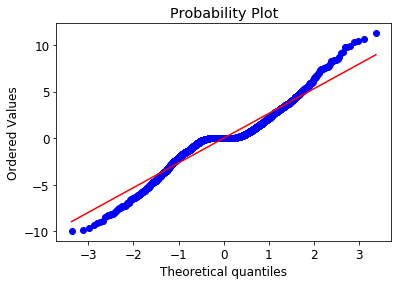

In [62]:
import pylab 
import scipy.stats as stats

stats.probplot(X_test_pred_all_rf['frame_diff'], dist="norm", plot=pylab)
pylab.show()

### Plotting Binned Frames vs Prediction Error

<Figure size 864x360 with 0 Axes>

Text(0.5, 0, 'Binned Frames')

Text(0, 0.5, 'Prediction Frame Error')

Text(0.5, 1.04, 'Binned Frames vs Prediction Error')

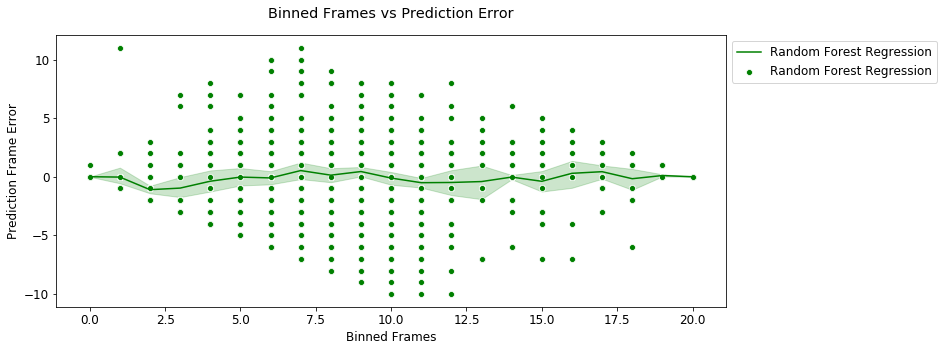

In [63]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(x="y_pred_binned", y="binned_frame_diff", data=X_test_pred_all_rf, label='Random Forest Regression',
                    color = 'green')
ax = sns.scatterplot(x="y_pred_binned", y="binned_frame_diff", data=X_test_pred_all_rf, label='Random Forest Regression',
                    color = 'green')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Binned Frames")
plt.ylabel("Prediction Frame Error")
plt.title("Binned Frames vs Prediction Error", y=1.04);
plt.grid(False)

### Actual vs Predicted Frame Counts

In [64]:
df_line = pd.DataFrame({'x': list(range(30)),
                        'y': list(range(30))})
df_line

x   y
0    0   0
1    1   1
2    2   2
3    3   3
4    4   4
5    5   5
6    6   6
7    7   7
8    8   8
9    9   9
10  10  10
11  11  11
12  12  12
13  13  13
14  14  14
15  15  15
16  16  16
17  17  17
18  18  18
19  19  19
20  20  20
21  21  21
22  22  22
23  23  23
24  24  24
25  25  25
26  26  26
27  27  27
28  28  28
29  29  29

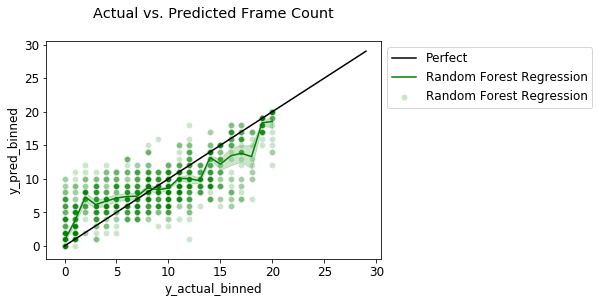

In [65]:
ax1 = sns.lineplot(x="x", y="y", data=df_line, label='Perfect', color='black')
ax2 = sns.lineplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_rf, color = 'green',
                   label='Random Forest Regression')
ax3 = sns.scatterplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_rf, color = 'green',
                      label='Random Forest Regression', alpha=0.2)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Actual vs. Predicted Frame Count", y=1.08);

### Feature Importance

In [66]:
pd.options.display.max_rows = 999
df_featimp = pd.DataFrame([item for item in zip(X[features].columns, rfm.feature_importances_)], 
                          columns=['feature', 'importance'])
df_featimp.sort_values(by='importance', ascending=False)

feature  importance
81                  std_temp    0.307713
94             windgustdaily    0.211618
90               windbearing    0.041820
36                  iqr_temp    0.032226
66             power_q1_temp    0.031404
62            power_iqr_temp    0.026670
13        entropy_mean_32x16    0.018345
68             power_q3_temp    0.018064
74                  pressure    0.011915
67             power_q2_temp    0.011091
26           entropy_std_4x2    0.010893
43             norm_iqr_temp    0.010501
8           entropy_max_16x8    0.009675
7             entropy_allimg    0.009071
24          entropy_std_16x8    0.008760
27           entropy_std_8x4    0.008664
93                  windgust    0.008339
65            power_min_temp    0.008296
25         entropy_std_32x16    0.007861
17      entropy_median_32x16    0.007743
20          entropy_min_16x8    0.007305
18        entropy_median_4x2    0.006636
10           entropy_max_4x2    0.006312
16       entropy_median_16x8    0.006131
23           entropy_min_8x4    0.006095
22           entropy_min_4x2    0.005841
11           entropy_max_8x4    0.005548
9          entropy_max_32x16    0.005383
5                   dewpoint    0.005338
19        entropy_median_8x4    0.005119
29                 hive_area    0.005032
64           power_mean_temp    0.004944
80           sec_from_sunset    0.004892
79          sec_from_sunrise    0.004573
95                 windspeed    0.004388
88                visibility    0.004235
30                  hive_vol    0.004232
85               total boxes    0.003927
12         entropy_mean_16x8    0.003889
51   norm_min_temparea_ratio    0.003843
52    norm_min_tempvol_ratio    0.003646
14          entropy_mean_4x2    0.003433
15          entropy_mean_8x4    0.003282
50             norm_min_temp    0.003196
63            power_max_temp    0.003131
42                 moonphase    0.003109
44             norm_max_temp    0.003096
38         iqr_tempvol_ratio    0.003055
55     norm_q1_tempvol_ratio    0.002921
89           visibilitydaily    0.002773
91          windbearingdaily    0.002693
37        iqr_temparea_ratio    0.002550
0        apparenttemperature    0.002451
34                  humidity    0.002427
53              norm_q1_temp    0.002405
71        precipintensitymax    0.002082
28                heat_index    0.002039
82               temperature    0.002023
46    norm_max_tempvol_ratio    0.002019
56              norm_q2_temp    0.001968
54    norm_q1_temparea_ratio    0.001967
41                  min_temp    0.001924
3                 cloudcover    0.001863
39                  max_temp    0.001819
59              norm_q3_temp    0.001757
86                   uvindex    0.001745
75             pressuredaily    0.001734
92                wind_chill    0.001713
96            windspeeddaily    0.001635
45   norm_max_temparea_ratio    0.001619
76                   q1_temp    0.001505
61     norm_q3_tempvol_ratio    0.001463
21         entropy_min_32x16    0.001417
58     norm_q2_tempvol_ratio    0.001372
49   norm_mean_tempvol_ratio    0.001328
47            norm_mean_temp    0.001280
78                   q3_temp    0.001271
60    norm_q3_temparea_ratio    0.001209
57    norm_q2_temparea_ratio    0.001198
48  norm_mean_temparea_ratio    0.001182
40                 mean_temp    0.001175
77                   q2_temp    0.001086
84            temperaturelow    0.000917
2     apparenttemperaturelow    0.000875
83           temperaturehigh    0.000852
4            cloudcoverdaily    0.000849
73    precipprobabilitydaily    0.000794
6             dewpointddaily    0.000783
87              uvindexdaily    0.000605
35             humiditydaily    0.000496
1    apparenttemperaturehigh    0.000412
70      precipintensitydaily    0.000341
32          hrs_from_sunrise    0.000299
33           hrs_from_sunset    0.000297
31                      hour    0.000290
69           precipintensity    0.000183
72         precipprobability    0.000114

### XGBoost Regressor

#### Grid Search

In [67]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# For hyperparameter selection
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)

xgb = XGBRegressor()
param_grid = {'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 700, 1000]}
n_jobs = 4 
regressor = GridSearchCV(estimator=xgb, cv=None, param_grid=param_grid, n_jobs=n_jobs)
best_est = regressor.fit(X_train1, y_train1)
print(regressor.best_estimator_)

print("Best Estimator Parameters")
print("---------------------------")

print(f"booster: {regressor.best_params_['objective']}")
print(f"learning_rate: {regressor.best_params_['learning_rate']}")
print(f"max_depth: {regressor.best_params_['max_depth']}")
print 
print(f"Train R-square: {regressor.score(X_cv, y_cv)}")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.03, max_delta_step=0,
       max_depth=7, min_child_weight=4, missing=None, n_estimators=700,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7, verbosity=1)
Best Estimator Parameters
---------------------------
booster: reg:linear
learning_rate: 0.03
max_depth: 7


<function print>

Train R-square: 0.7537191992560581


#### K-fold Cross-validation on test set

In [68]:
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

X_test_pred_all_xgb = pd.DataFrame()
rsq_list = []
adj_rsq_list = []
mae_list = []
rmse_list = []
print("rsq  adj-rsq  mae  rmse")
kfold = KFold(10, True, 1)

for train_index, test_index in kfold.split(X_train): 
    X_train1 = X_train.iloc[train_index][features]
    X_cv = X_train.iloc[test_index][features]
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    xgbb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                        colsample_bynode=1, colsample_bytree=0.7, gamma=0,
                        importance_type='gain', learning_rate=0.03, max_delta_step=0,
                        max_depth=7, min_child_weight=4, missing=None, n_estimators=700,
                        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
                        subsample=0.7, verbosity=1)
    xgbb_model = xgbb.fit(X_train1, y_train1)
    xgbb_predict = xgbb.predict(X_cv)
    rsq = xgbb.score(X_cv, y_cv)
    rsq_list.append(rsq)
    adj_rsq = 1 - (1-rsq)*(len(y_cv)-1)/(len(y_cv)-X_cv.shape[1]-1)
    adj_rsq_list.append(adj_rsq)
    mae = mean_absolute_error(y_cv, xgbb_predict)
    mae_list.append(mae)
    rmse = sqrt(mean_squared_error(y_cv, xgbb_predict))
    rmse_list.append(rmse)
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = X_train.iloc[test_index].copy()
    X_test_pred.reset_index(inplace=True)
    df_y_test_hs = pd.DataFrame({'y_actual': y_train.iloc[test_index]})
    df_y_test_hs.reset_index(inplace=True)
    X_test_pred['y_actual'] = df_y_test_hs['y_actual'].values
    X_test_pred['y_pred'] = xgbb_predict
    X_test_pred['frame_diff'] = X_test_pred['y_actual'] - X_test_pred['y_pred']
    X_test_pred['abs_frame_diff'] = abs(X_test_pred['y_actual'] - X_test_pred['y_pred'])
    X_test_pred_all_xgb = X_test_pred_all_xgb.append(X_test_pred)    
    
ranks["XGB"] = ranking(xgbb.feature_importances_, features);

rsq  adj-rsq  mae  rmse
0.726 0.414 1.906 2.99
0.772 0.513 1.693 2.702
0.767 0.5 1.755 2.828
0.724 0.409 1.984 2.937
0.799 0.566 1.701 2.594
0.806 0.581 1.546 2.464
0.797 0.563 1.752 2.689
0.736 0.432 1.956 3.01
0.761 0.486 1.76 2.63
0.725 0.408 2.012 3.098


#### Reporting average performance metrics

In [69]:
print(f"Mean R-squared for 10 Iterations          : {np.array(rsq_list).mean():1.5}")
print(f"Mean Adjusted R-squared for 10 Iterations : {np.array(adj_rsq_list).mean():1.5}")
print(f"Mean MAE for 10 Iterations                : {np.array(mae_list).mean():1.5} frames")
print(f"Mean RMSE for 10 Iterations               : {np.array(rmse_list).mean():1.5} frames")

# Mean difference for incorrect predictions
xgbb_diff = X_test_pred_all_xgb['y_actual'] - X_test_pred_all_xgb['y_pred']
mean_frame_diff = abs(xgbb_diff[xgbb_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(xgbb_diff[xgbb_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_pred_all_xgb[X_test_pred_all_xgb['abs_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_xgb['abs_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_xgb[X_test_pred_all_xgb['abs_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_xgb['abs_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_xgb[X_test_pred_all_xgb['abs_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_xgb['abs_frame_diff']) * 100)

print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

Mean R-squared for 10 Iterations          : 0.76145
Mean Adjusted R-squared for 10 Iterations : 0.48735
Mean MAE for 10 Iterations                : 1.8065 frames
Mean RMSE for 10 Iterations               : 2.7942 frames

Mean difference for Incorrect Predictions:   2.8 frames
Median difference for Incorrect Predictions: 2.1 frames

% Predictions Within 1 Frame         : 55.32%
% Predictions Within 2 Frames        : 70.01%
% Predictions Within 3 Frames        : 79.39%


Min Diff: -12.280036926269531, Max Diff: 12.897359371185303


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

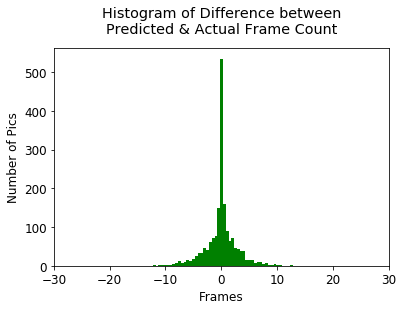

In [70]:
print(f"Min Diff: {X_test_pred_all_xgb['frame_diff'].min()}, Max Diff: {X_test_pred_all_xgb['frame_diff'].max()}")
(X_test_pred_all_xgb['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

### Checking binned frame error

In [71]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_pred_all_xgb['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_pred_all_xgb['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_pred_all_xgb['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_pred_all_xgb['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_pred_all_xgb['binned_frame_diff'] = X_test_pred_all_xgb['y_actual_binned'] - \
                                            X_test_pred_all_xgb['y_pred_binned']
X_test_pred_all_xgb['abs_binned_frame_diff'] = abs(X_test_pred_all_xgb['binned_frame_diff'])
X_test_pred_all_xgb

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        242    460     2.0    0.0    2.0   0.0     0.0    0.0   
1        281    499     2.0    0.0    0.0   0.0     0.0    0.0   
2       1740   3382     2.0    0.0    0.0   0.0     0.0    0.0   
3       1227   2869     2.0    0.0    0.0   0.0     0.0    0.0   
4       2193   3853     2.0    0.0    0.0   0.0     0.0    0.0   
5        134    352     2.0    0.0    0.0   0.0     0.0    0.0   
6       1156   2624     2.0    0.0    1.0   0.0     0.0    0.0   
7       1953   3597     2.0    0.0    0.0   0.0     0.0    0.0   
8       2087   3736     1.0    0.0    1.0   0.0     0.0    0.0   
9        161    379     2.0    0.0    0.0   0.0     0.0    0.0   
10      1285   2927     2.0    0.0    0.0   0.0     0.0    0.0   
11       495    763     2.0    0.0    0.0   0.0     1.0    0.0   
12      1122   2542     2.0    0.0    0.0   0.0     0.0    0.0   
13      1216   2858     2.0    0.0    0.0   0.0     0.0    0.0   
14        72    226     2.0    0.0    1.0   0.0     0.0    0.0   
15      1875   3517     2.0    0.0    0.0   0.0     0.0    0.0   
16      1923   3567     2.0    0.0    0.0   0.0     0.0    0.0   
17       282    500     2.0    0.0    2.0   0.0     0.0    0.0   
18       510    804     2.0    0.0    0.0   0.0     0.0    0.0   
19       461    679     2.0    0.0    0.0   0.0     0.0    0.0   
20      1734   3376     2.0    0.0    0.0   0.0     0.0    0.0   
21      1232   2874     2.0    0.0    0.0   0.0     0.0    0.0   
22      2114   3765     2.0    0.0    0.0   0.0     0.0    0.0   
23      2035   3679     2.0    0.0    0.0   0.0     0.0    0.0   
24      1967   3611     2.0    0.0    0.0   0.0     0.0    0.0   
25      1310   2952     2.0    0.0    0.0   0.0     0.0    0.0   
26       680   1285     2.0    0.0    0.0   0.0     0.0    0.0   
27      2132   3783     2.0    0.0    0.0   0.0     0.0    0.0   
28       354    572     2.0    0.0    0.0   0.0     0.0    0.0   
29       179    397     2.0    0.0    2.0   0.0     0.0    0.0   
30      1158   2626     2.0    0.0    1.0   0.0     0.0    0.0   
31       458    676     2.0    0.0    0.0   0.0     0.0    0.0   
32       435    653     2.0    0.0    0.0   0.0     0.0    0.0   
33      2082   3731     1.0    0.0    1.0   0.0     0.0    0.0   
34        93    311     2.0    0.0    0.0   0.0     0.0    0.0   
35      1859   3501     2.0    0.0    0.0   0.0     0.0    0.0   
36      1613   3255     2.0    0.0    0.0   0.0     0.0    0.0   
37       712   1365     2.0    0.0    0.0   0.0     0.0    0.0   
38       310    528     2.0    0.0    0.0   0.0     0.0    0.0   
39       720   1385     2.0    0.0    0.0   0.0     0.0    0.0   
40      1303   2945     2.0    0.0    0.0   0.0     0.0    0.0   
41      1655   3297     2.0    0.0    0.0   0.0     0.0    0.0   
42       192    410     2.0    0.0    0.0   0.0     0.0    0.0   
43      1368   3010     2.0    0.0    0.0   0.0     0.0    0.0   
44      1753   3395     2.0    0.0    0.0   0.0     0.0    0.0   
45      2003   3647     2.0    0.0    0.0   0.0     0.0    0.0   
46      2019   3663     2.0    0.0    0.0   0.0     0.0    0.0   
47      1932   3576     2.0    0.0    0.0   0.0     0.0    0.0   
48      2129   3780     2.0    0.0    0.0   0.0     0.0    0.0   
49       117    335     2.0    0.0    0.0   0.0     0.0    0.0   
50      2011   3655     2.0    0.0    0.0   0.0     0.0    0.0   
51       403    621     2.0    0.0    0.0   0.0     0.0    0.0   
52       602   1093     2.0    0.0    0.0   0.0     0.0    0.0   
53      1737   3379     2.0    0.0    0.0   0.0     0.0    0.0   
54      1266   2908     2.0    0.0    0.0   0.0     0.0    0.0   
55      2167   3818     2.0    0.0    0.0   0.0     0.0    0.0   
56      1340   2982     2.0    0.0    0.0   0.0     0.0    0.0   
57      1153   2621     2.0    0.0    1.0   0.0     0.0    0.0   
58      1612   3254     2.0    0.0    0.0   0.0     0.0    0.0   
59      1105   2499     2.0    0.0    0.0   0

In [72]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_pred_all_xgb[X_test_pred_all_xgb['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_xgb['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_xgb[X_test_pred_all_xgb['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_xgb['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_xgb[X_test_pred_all_xgb['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_xgb['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 57.62%
% Predictions Within 2 Frames        : 71.27%
% Predictions Within 3 Frames        : 81.03%


### Plotting Probability Plot for Residual Error
-> Shows how close to error distribution is to Normal. If the distribution is Normal, then all the residual errors will line up perfectly on the red line

((array([-3.36700779, -3.11419469, -2.97386448, ...,  2.97386448,
          3.11419469,  3.36700779]),
  array([-12.28003693, -11.11575508, -10.65227699, ...,  10.4354341 ,
          10.46257591,  12.89735937])),
 (2.706873487037152, 0.010611140197306876, 0.9646769069884726))

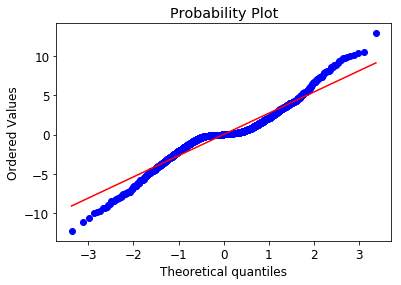

In [73]:
import pylab 
import scipy.stats as stats

stats.probplot(X_test_pred_all_xgb['frame_diff'], dist="norm", plot=pylab)
pylab.show()

### Predicted vs Actual Frame Counts

In [74]:
df_line = pd.DataFrame({'x': list(range(30)),
                        'y': list(range(30))})
df_line

x   y
0    0   0
1    1   1
2    2   2
3    3   3
4    4   4
5    5   5
6    6   6
7    7   7
8    8   8
9    9   9
10  10  10
11  11  11
12  12  12
13  13  13
14  14  14
15  15  15
16  16  16
17  17  17
18  18  18
19  19  19
20  20  20
21  21  21
22  22  22
23  23  23
24  24  24
25  25  25
26  26  26
27  27  27
28  28  28
29  29  29

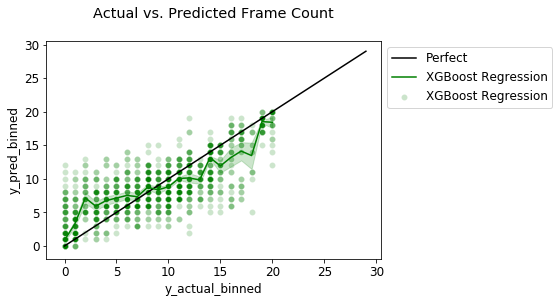

In [75]:
ax1 = sns.lineplot(x="x", y="y", data=df_line, label='Perfect', color='black')
ax2 = sns.lineplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_xgb, color = 'green',
                   label='XGBoost Regression')
ax3 = sns.scatterplot(x="y_actual_binned", y="y_pred_binned", data=X_test_pred_all_xgb, color = 'green',
                      label='XGBoost Regression', alpha=0.2)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Actual vs. Predicted Frame Count", y=1.08);

### Plotting Hours after Sunrise vs. Absolute Frame Prediction Error

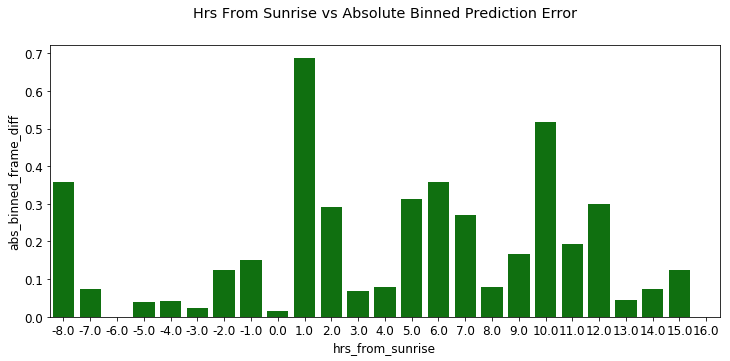

In [76]:
xgbb_grp = X_test_pred_all_xgb.groupby('hrs_from_sunrise').mean()['binned_frame_diff']
xgbb_grp = xgbb_grp.reset_index()
xgbb_grp['abs_binned_frame_diff'] = abs(xgbb_grp['binned_frame_diff'])
xgbb_grp['hrs_from_sunrise'] = xgbb_grp['hrs_from_sunrise'].map(lambda x: round(x, 0))

fig = plt.figure(figsize=(12,5))
ax = sns.barplot(x="hrs_from_sunrise", y="abs_binned_frame_diff", data=xgbb_grp, label='XGBoost Regression', 
                  color='green',ci=False)
plt.title('Hrs From Sunrise vs Absolute Binned Prediction Error', y=1.08);

### Plotting Hours after Sunrise vs. Frame Prediction Error

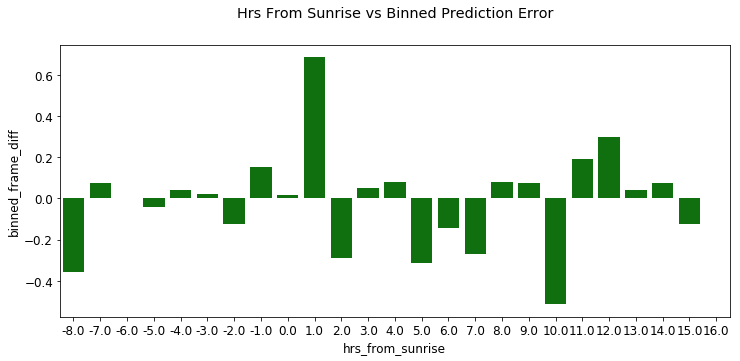

In [77]:
xgbb_grp = X_test_pred_all_xgb.groupby('hrs_from_sunrise').mean()['binned_frame_diff']
xgbb_grp = xgbb_grp.reset_index()
xgbb_grp['hrs_from_sunrise'] = xgbb_grp['hrs_from_sunrise'].map(lambda x: round(x, 0))

fig = plt.figure(figsize=(12,5))
ax = sns.barplot(x="hrs_from_sunrise", y="binned_frame_diff", data=xgbb_grp, label='XGBoost Regression', 
                  color='green',ci=False)
plt.title('Hrs From Sunrise vs Binned Prediction Error', y=1.08);

#### Feature Importances

In [78]:
df_featimp = pd.DataFrame([item for item in zip(X[features].columns, xgbb.feature_importances_)], 
                          columns=['feature', 'importance'])
df_featimp.sort_values(by='importance', ascending=False)

feature  importance
94             windgustdaily    0.213874
30                  hive_vol    0.077389
81                  std_temp    0.067403
84            temperaturelow    0.045581
29                 hive_area    0.036221
68             power_q3_temp    0.027401
90               windbearing    0.023363
65            power_min_temp    0.021586
66             power_q1_temp    0.020694
83           temperaturehigh    0.020426
62            power_iqr_temp    0.020030
36                  iqr_temp    0.018680
73    precipprobabilitydaily    0.018591
37        iqr_temparea_ratio    0.017240
2     apparenttemperaturelow    0.017025
93                  windgust    0.016241
38         iqr_tempvol_ratio    0.013971
91          windbearingdaily    0.012220
42                 moonphase    0.011993
96            windspeeddaily    0.011058
67             power_q2_temp    0.010498
13        entropy_mean_32x16    0.009779
89           visibilitydaily    0.008776
70      precipintensitydaily    0.008455
55     norm_q1_tempvol_ratio    0.007291
71        precipintensitymax    0.006898
54    norm_q1_temparea_ratio    0.006888
34                  humidity    0.006507
74                  pressure    0.006080
1    apparenttemperaturehigh    0.006054
6             dewpointddaily    0.005876
63            power_max_temp    0.005709
17      entropy_median_32x16    0.005631
79          sec_from_sunrise    0.005478
64           power_mean_temp    0.005351
95                 windspeed    0.005043
16       entropy_median_16x8    0.005039
87              uvindexdaily    0.004999
35             humiditydaily    0.004949
28                heat_index    0.004848
75             pressuredaily    0.004658
14          entropy_mean_4x2    0.004196
52    norm_min_tempvol_ratio    0.004030
18        entropy_median_4x2    0.003973
51   norm_min_temparea_ratio    0.003901
82               temperature    0.003866
78                   q3_temp    0.003746
0        apparenttemperature    0.003719
45   norm_max_temparea_ratio    0.003701
5                   dewpoint    0.003631
77                   q2_temp    0.003576
88                visibility    0.003567
60    norm_q3_temparea_ratio    0.003468
53              norm_q1_temp    0.003455
8           entropy_max_16x8    0.003338
15          entropy_mean_8x4    0.003318
57    norm_q2_temparea_ratio    0.003313
80           sec_from_sunset    0.003266
4            cloudcoverdaily    0.003266
32          hrs_from_sunrise    0.003204
11           entropy_max_8x4    0.003187
43             norm_iqr_temp    0.003027
19        entropy_median_8x4    0.002932
24          entropy_std_16x8    0.002927
9          entropy_max_32x16    0.002917
12         entropy_mean_16x8    0.002756
27           entropy_std_8x4    0.002741
46    norm_max_tempvol_ratio    0.002740
10           entropy_max_4x2    0.002732
22           entropy_min_4x2    0.002711
41                  min_temp    0.002682
56              norm_q2_temp    0.002681
58     norm_q2_tempvol_ratio    0.002675
26           entropy_std_4x2    0.002669
33           hrs_from_sunset    0.002661
47            norm_mean_temp    0.002457
31                      hour    0.002441
25         entropy_std_32x16    0.002430
7             entropy_allimg    0.002333
48  norm_mean_temparea_ratio    0.002326
76                   q1_temp    0.002280
61     norm_q3_tempvol_ratio    0.002259
39                  max_temp    0.002258
59              norm_q3_temp    0.002234
20          entropy_min_16x8    0.002212
86                   uvindex    0.002202
40                 mean_temp    0.002148
92                wind_chill    0.002094
23           entropy_min_8x4    0.002043
85               total boxes    0.002038
44             norm_max_temp    0.002008
50             norm_min_temp    0.001971
3                 cloudcover    0.001587
21         entropy_min_32x16    0.001581
49   norm_mean_tempvol_ratio    0.001390
69           precipintensity    0.000856
72         precipprobability    0.000482

### Support Vector Regressor

#### Grid Search

In [79]:
from sklearn.svm import SVR

# For hyperparameter selection
stdscl = StandardScaler()
X_train1, X_cv, y_train1, y_cv = train_test_split(X_train[features], y_train, test_size=0.2)
X_train1_std = stdscl.fit_transform(X_train1)
X_cv_std = stdscl.transform(X_cv)

svr = SVR()
param_grid = {'C' : [0.1, 1.0, 10.0],
              'epsilon' : [0.01, 0.03, 0.05, 0.07, 0.10],
              'tol' : [0.01, 0.001, 0.005, 0.0001]}

n_jobs = 4 
regressor = GridSearchCV(estimator=svr, cv=None, param_grid=param_grid, n_jobs=n_jobs)
best_est = regressor.fit(X_train1_std, y_train1)
print(regressor.best_estimator_)

print("Best Estimator Parameters")
print("---------------------------")
print(f"C: {regressor.best_params_['C']}")
print(f"epsilon: {regressor.best_params_['epsilon']}")
print(f"tol: {regressor.best_params_['tol']}")
print 
print(f"Train R-squared: {regressor.score(X_cv_std, y_cv)}")

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.01, verbose=False)
Best Estimator Parameters
---------------------------
C: 10.0
epsilon: 0.1
tol: 0.01


<function print>

Train R-squared: 0.7678656204518161


#### K-fold Cross-validation on test set

In [80]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold

X_test_pred_all_svr = pd.DataFrame()
rsq_list = []
adj_rsq_list = []
mae_list = []
rmse_list = []
print("rsq  adj-rsq  mae  rmse")
kfold = KFold(10, True, 1)

for train_index, test_index in kfold.split(X_train): 
    stdscl = StandardScaler()
    X_train1_std = stdscl.fit_transform(X_train.iloc[train_index][features])
    X_cv_std = stdscl.transform(X_train.iloc[test_index][features])
    y_train1 = y_train.iloc[train_index]
    y_cv = y_train.iloc[test_index]

    svr = SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
              gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
              tol=0.01, verbose=False)
    svr_model = svr.fit(X_train1_std, y_train1)
    svr_predict = svr.predict(X_cv_std)
    rsq = svr.score(X_cv_std, y_cv)
    rsq_list.append(rsq)
    adj_rsq = 1 - (1-rsq)*(len(y_cv)-1)/(len(y_cv)-X_cv_std.shape[1]-1)
    adj_rsq_list.append(adj_rsq)
    mae = mean_absolute_error(y_cv, svr_predict)
    mae_list.append(mae)
    rmse = sqrt(mean_squared_error(y_cv, svr_predict))
    rmse_list.append(rmse)
    print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))
    
    # Creating Dataframe with differences of predicted vs actual for plotting
    X_test_pred = X_train.iloc[test_index].copy()
    X_test_pred.reset_index(inplace=True)
    df_y_test_hs = pd.DataFrame({'y_actual': y_train.iloc[test_index]})
    df_y_test_hs.reset_index(inplace=True)
    X_test_pred['y_actual'] = df_y_test_hs['y_actual'].values
    X_test_pred['y_pred'] = svr_predict
    X_test_pred['frame_diff'] = X_test_pred['y_actual'] - X_test_pred['y_pred']
    X_test_pred['abs_frame_diff'] = abs(X_test_pred['y_actual'] - X_test_pred['y_pred'])
    X_test_pred_all_svr = X_test_pred_all_svr.append(X_test_pred)    

rsq  adj-rsq  mae  rmse
0.693 0.344 2.142 3.165
0.779 0.527 1.764 2.661
0.794 0.559 1.734 2.657
0.638 0.225 2.254 3.362
0.713 0.382 2.023 3.097
0.766 0.496 1.825 2.702
0.734 0.426 2.015 3.084
0.683 0.318 2.142 3.299
0.744 0.447 1.86 2.727
0.715 0.385 2.108 3.158


#### Reporting average performance metrics

In [81]:
print(f"Mean R-squared for 10 Iterations          : {np.array(rsq_list).mean():1.5}")
print(f"Mean Adjusted R-squared for 10 Iterations : {np.array(adj_rsq_list).mean():1.5}")
print(f"Mean MAE for 10 Iterations                : {np.array(mae_list).mean():1.5} frames")
print(f"Mean RMSE for 10 Iterations               : {np.array(rmse_list).mean():1.5} frames")

# Mean difference for incorrect predictions
svr_diff = X_test_pred_all_svr['y_actual'] - X_test_pred_all_svr['y_pred']
mean_frame_diff = abs(svr_diff[svr_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(svr_diff[svr_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_pred_all_svr[X_test_pred_all_svr['abs_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_svr['abs_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_svr[X_test_pred_all_svr['abs_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_svr['abs_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_svr[X_test_pred_all_svr['abs_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_svr['abs_frame_diff']) * 100)

print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

Mean R-squared for 10 Iterations          : 0.72594
Mean Adjusted R-squared for 10 Iterations : 0.41095
Mean MAE for 10 Iterations                : 1.9867 frames
Mean RMSE for 10 Iterations               : 2.9913 frames

Mean difference for Incorrect Predictions:   2.8 frames
Median difference for Incorrect Predictions: 2.3 frames

% Predictions Within 1 Frame         : 52.74%
% Predictions Within 2 Frames        : 66.78%
% Predictions Within 3 Frames        : 78.18%


Min Diff: -14.514340141928498, Max Diff: 12.781771900650021


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

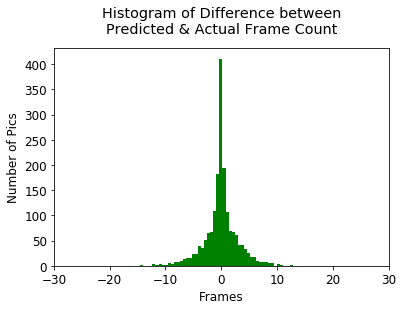

In [82]:
print(f"Min Diff: {X_test_pred_all_svr['frame_diff'].min()}, Max Diff: {X_test_pred_all_svr['frame_diff'].max()}")
(X_test_pred_all_svr['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

### Checking binned frame error

In [83]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_pred_all_svr['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_pred_all_svr['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_pred_all_svr['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_pred_all_svr['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_pred_all_svr['binned_frame_diff'] = X_test_pred_all_svr['y_actual_binned'] - \
                                            X_test_pred_all_svr['y_pred_binned']
X_test_pred_all_svr['abs_binned_frame_diff'] = abs(X_test_pred_all_svr['binned_frame_diff'])
X_test_pred_all_svr

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        242    460     2.0    0.0    2.0   0.0     0.0    0.0   
1        281    499     2.0    0.0    0.0   0.0     0.0    0.0   
2       1740   3382     2.0    0.0    0.0   0.0     0.0    0.0   
3       1227   2869     2.0    0.0    0.0   0.0     0.0    0.0   
4       2193   3853     2.0    0.0    0.0   0.0     0.0    0.0   
5        134    352     2.0    0.0    0.0   0.0     0.0    0.0   
6       1156   2624     2.0    0.0    1.0   0.0     0.0    0.0   
7       1953   3597     2.0    0.0    0.0   0.0     0.0    0.0   
8       2087   3736     1.0    0.0    1.0   0.0     0.0    0.0   
9        161    379     2.0    0.0    0.0   0.0     0.0    0.0   
10      1285   2927     2.0    0.0    0.0   0.0     0.0    0.0   
11       495    763     2.0    0.0    0.0   0.0     1.0    0.0   
12      1122   2542     2.0    0.0    0.0   0.0     0.0    0.0   
13      1216   2858     2.0    0.0    0.0   0.0     0.0    0.0   
14        72    226     2.0    0.0    1.0   0.0     0.0    0.0   
15      1875   3517     2.0    0.0    0.0   0.0     0.0    0.0   
16      1923   3567     2.0    0.0    0.0   0.0     0.0    0.0   
17       282    500     2.0    0.0    2.0   0.0     0.0    0.0   
18       510    804     2.0    0.0    0.0   0.0     0.0    0.0   
19       461    679     2.0    0.0    0.0   0.0     0.0    0.0   
20      1734   3376     2.0    0.0    0.0   0.0     0.0    0.0   
21      1232   2874     2.0    0.0    0.0   0.0     0.0    0.0   
22      2114   3765     2.0    0.0    0.0   0.0     0.0    0.0   
23      2035   3679     2.0    0.0    0.0   0.0     0.0    0.0   
24      1967   3611     2.0    0.0    0.0   0.0     0.0    0.0   
25      1310   2952     2.0    0.0    0.0   0.0     0.0    0.0   
26       680   1285     2.0    0.0    0.0   0.0     0.0    0.0   
27      2132   3783     2.0    0.0    0.0   0.0     0.0    0.0   
28       354    572     2.0    0.0    0.0   0.0     0.0    0.0   
29       179    397     2.0    0.0    2.0   0.0     0.0    0.0   
30      1158   2626     2.0    0.0    1.0   0.0     0.0    0.0   
31       458    676     2.0    0.0    0.0   0.0     0.0    0.0   
32       435    653     2.0    0.0    0.0   0.0     0.0    0.0   
33      2082   3731     1.0    0.0    1.0   0.0     0.0    0.0   
34        93    311     2.0    0.0    0.0   0.0     0.0    0.0   
35      1859   3501     2.0    0.0    0.0   0.0     0.0    0.0   
36      1613   3255     2.0    0.0    0.0   0.0     0.0    0.0   
37       712   1365     2.0    0.0    0.0   0.0     0.0    0.0   
38       310    528     2.0    0.0    0.0   0.0     0.0    0.0   
39       720   1385     2.0    0.0    0.0   0.0     0.0    0.0   
40      1303   2945     2.0    0.0    0.0   0.0     0.0    0.0   
41      1655   3297     2.0    0.0    0.0   0.0     0.0    0.0   
42       192    410     2.0    0.0    0.0   0.0     0.0    0.0   
43      1368   3010     2.0    0.0    0.0   0.0     0.0    0.0   
44      1753   3395     2.0    0.0    0.0   0.0     0.0    0.0   
45      2003   3647     2.0    0.0    0.0   0.0     0.0    0.0   
46      2019   3663     2.0    0.0    0.0   0.0     0.0    0.0   
47      1932   3576     2.0    0.0    0.0   0.0     0.0    0.0   
48      2129   3780     2.0    0.0    0.0   0.0     0.0    0.0   
49       117    335     2.0    0.0    0.0   0.0     0.0    0.0   
50      2011   3655     2.0    0.0    0.0   0.0     0.0    0.0   
51       403    621     2.0    0.0    0.0   0.0     0.0    0.0   
52       602   1093     2.0    0.0    0.0   0.0     0.0    0.0   
53      1737   3379     2.0    0.0    0.0   0.0     0.0    0.0   
54      1266   2908     2.0    0.0    0.0   0.0     0.0    0.0   
55      2167   3818     2.0    0.0    0.0   0.0     0.0    0.0   
56      1340   2982     2.0    0.0    0.0   0.0     0.0    0.0   
57      1153   2621     2.0    0.0    1.0   0.0     0.0    0.0   
58      1612   3254     2.0    0.0    0.0   0.0     0.0    0.0   
59      1105   2499     2.0    0.0    0.0   0

In [84]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_pred_all_svr[X_test_pred_all_svr['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_pred_all_svr['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_pred_all_svr[X_test_pred_all_svr['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_pred_all_svr['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_pred_all_svr[X_test_pred_all_svr['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_pred_all_svr['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 54.61%
% Predictions Within 2 Frames        : 67.71%
% Predictions Within 3 Frames        : 77.91%


### Plotting Probability Plot for Residual Error
-> Shows how close to error distribution is to Normal. If the distribution is Normal, then all the residual errors will line up perfectly on the red line

((array([-3.36700779, -3.11419469, -2.97386448, ...,  2.97386448,
          3.11419469,  3.36700779]),
  array([-14.51434014, -12.23522743, -12.07421274, ...,  10.64820088,
          10.89554806,  12.7817719 ])),
 (2.9163986357868326, -0.01366597198582505, 0.9697017427825666))

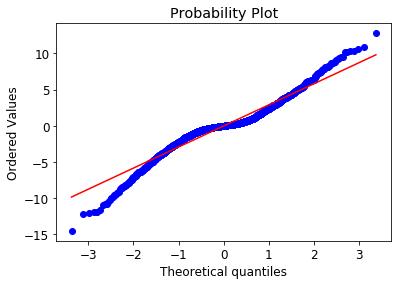

In [85]:
import pylab 
import scipy.stats as stats

stats.probplot(X_test_pred_all_svr['frame_diff'], dist="norm", plot=pylab)
pylab.show()

In [86]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in features:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in features:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	DTree	Lasso	LinReg	RF	Ridge	XGB	Mean
apparenttemperature	0.0	0.02	0.0	0.01	0.32	0.02	0.06
apparenttemperaturehigh	0.0	0.0	0.0	0.0	0.2	0.03	0.04
apparenttemperaturelow	0.0	0.1	0.0	0.0	0.43	0.08	0.1
cloudcover	0.0	0.0	0.0	0.01	0.06	0.01	0.01
cloudcoverdaily	0.0	0.11	0.0	0.0	0.38	0.01	0.08
dewpoint	0.01	0.02	0.0	0.02	0.2	0.01	0.04
dewpointddaily	0.0	0.04	0.0	0.0	0.22	0.03	0.05
entropy_allimg	0.0	0.01	0.0	0.03	0.09	0.01	0.02
entropy_max_16x8	0.02	0.07	0.0	0.03	0.28	0.01	0.07
entropy_max_32x16	0.0	0.0	0.0	0.02	0.2	0.01	0.04
entropy_max_4x2	0.0	0.0	0.0	0.02	0.1	0.01	0.02
entropy_max_8x4	0.0	0.09	0.0	0.02	0.49	0.01	0.1
entropy_mean_16x8	0.0	0.14	0.0	0.01	0.26	0.01	0.07
entropy_mean_32x16	0.08	0.0	0.0	0.06	0.18	0.04	0.06
entropy_mean_4x2	0.0	0.14	0.0	0.01	0.38	0.02	0.09
entropy_mean_8x4	0.0	0.0	0.0	0.01	0.15	0.01	0.03
entropy_median_16x8	0.02	0.0	0.0	0.02	0.06	0.02	0.02
entropy_median_32x16	0.01	0.0	0.0	0.02	0.09	0.02	0.02
entropy_median_4x2	0.0	0.1	0.0	0.02	0.54	0.02	0.11
entropy_median_8x4	

In [87]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

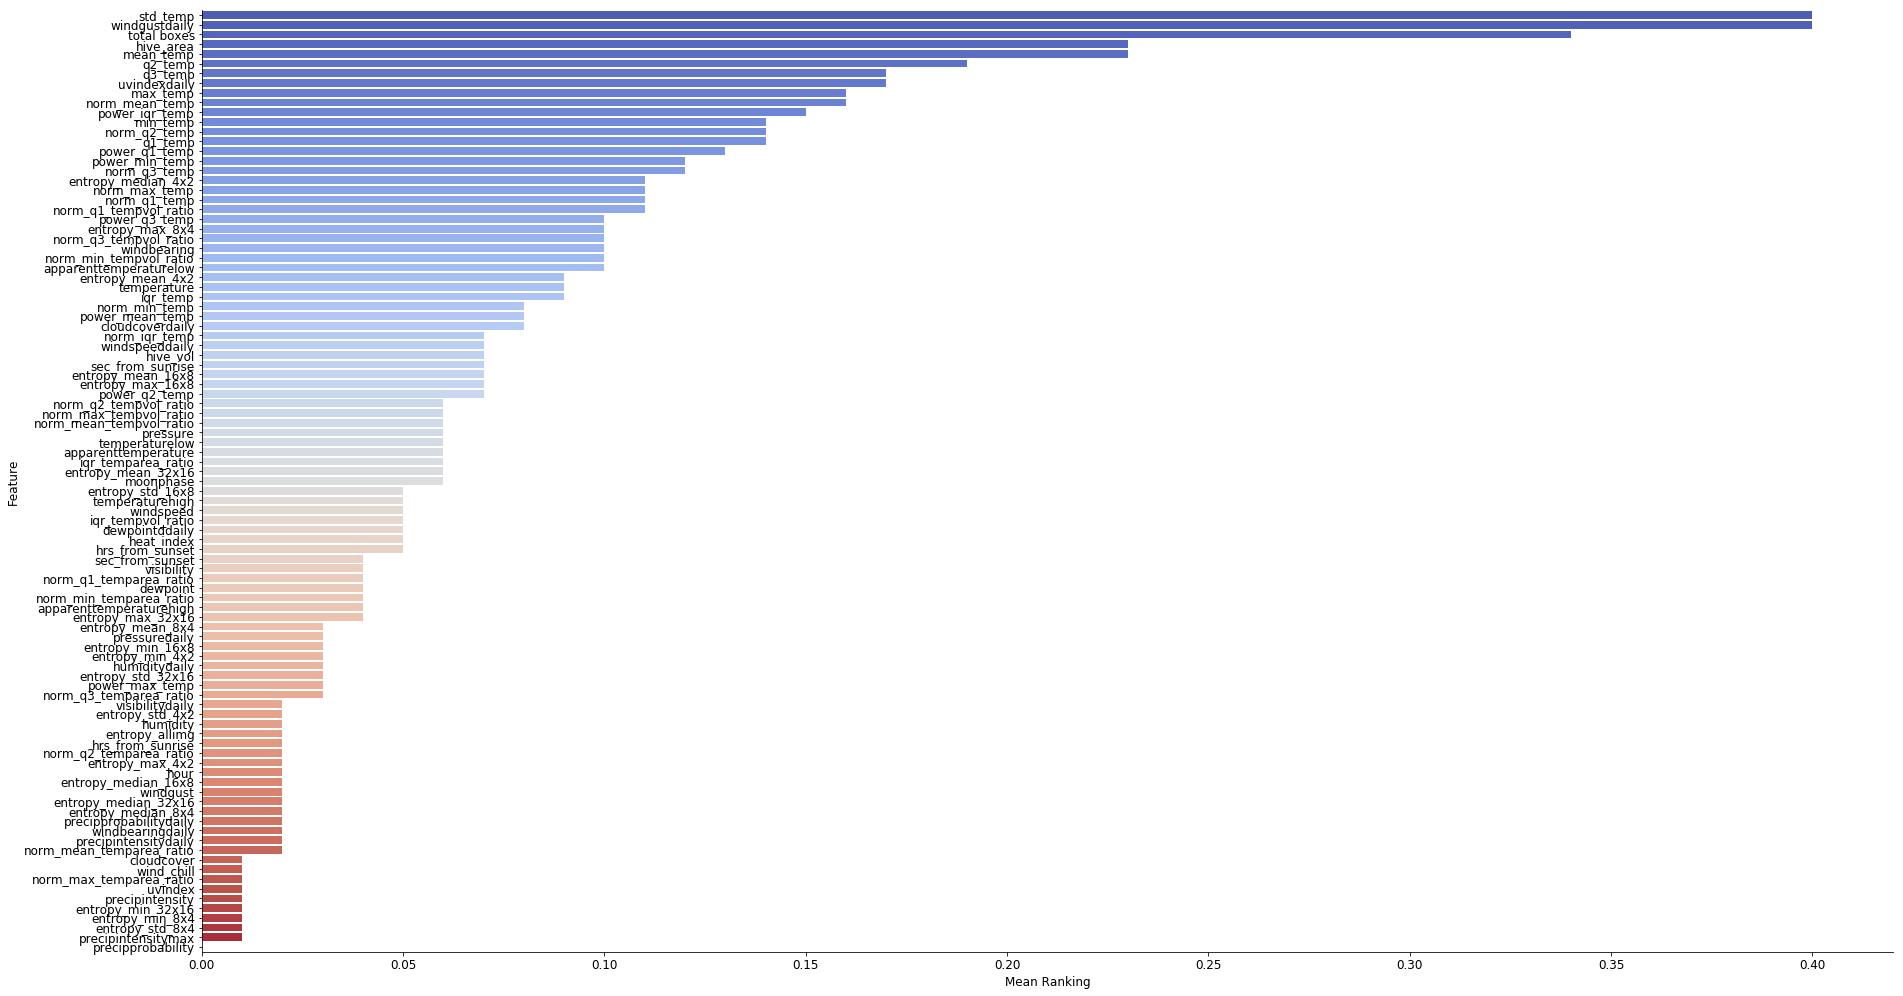

In [88]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [89]:
features_upd = np.sort(meanplot[meanplot['Mean Ranking'] >= 0.09]['Feature'].values)
features_upd

array(['apparenttemperaturelow', 'entropy_max_8x4', 'entropy_mean_4x2',
       'entropy_median_4x2', 'hive_area', 'iqr_temp', 'max_temp',
       'mean_temp', 'min_temp', 'norm_max_temp', 'norm_mean_temp',
       'norm_min_tempvol_ratio', 'norm_q1_temp', 'norm_q1_tempvol_ratio',
       'norm_q2_temp', 'norm_q3_temp', 'norm_q3_tempvol_ratio',
       'power_iqr_temp', 'power_min_temp', 'power_q1_temp',
       'power_q3_temp', 'q1_temp', 'q2_temp', 'q3_temp', 'std_temp',
       'temperature', 'total boxes', 'uvindexdaily', 'windbearing',
       'windgustdaily'], dtype=object)

### Evaluating best models on Holdout (Test) set

#### Random Forest

In [90]:
# Train model on entire Training set
rfm = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                            max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0, warm_start=False)
rfm_model = rfm.fit(X_train[features], y_train)

rfm_predict_test = rfm.predict(X_test[features])
rsq = rfm.score(X_test[features], y_test)
adj_rsq = 1 - (1-rsq)*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))
mae = mean_absolute_error(y_test, rfm_predict_test)
rmse = sqrt(mean_squared_error(y_test, rfm_predict_test))

#### Getting dataframe with prediction errors

In [91]:
X_test_w_pred_rfm_test = X_test.copy()
X_test_w_pred_rfm_test.reset_index(inplace=True)
df_y_test_rfm_test = pd.DataFrame({'y_actual': y_test})
df_y_test_rfm_test.reset_index(inplace=True)
X_test_w_pred_rfm_test['y_actual'] = df_y_test_rfm_test['y_actual'].values
X_test_w_pred_rfm_test['y_pred'] = rfm_predict_test
X_test_w_pred_rfm_test['frame_diff'] = X_test_w_pred_rfm_test['y_actual'] - X_test_w_pred_rfm_test['y_pred']
X_test_w_pred_rfm_test['abs_frame_diff'] = abs(X_test_w_pred_rfm_test['y_actual'] - X_test_w_pred_rfm_test['y_pred'])

print(f"R-squared          : {rsq:1.5}")
print(f"Adjusted R-squared : {adj_rsq:1.5}")
print(f"MAE                : {mae:1.5} frames")
print(f"RMSE               : {rmse:1.5} frames")

# Mean difference for incorrect predictions
test_rfm_diff = X_test_w_pred_rfm_test['y_actual'] - X_test_w_pred_rfm_test['y_pred']
mean_frame_diff = abs(test_rfm_diff[test_rfm_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(test_rfm_diff[test_rfm_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 1.25]) / 
                 len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)
within2frames = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 2.25]) / 
                 len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)
within3frames = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_frame_diff'] < 3.25]) / 
                 len(X_test_w_pred_rfm_test['abs_frame_diff']) * 100)

print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

R-squared          : 0.78687
Adjusted R-squared : 0.78734
MAE                : 1.6397 frames
RMSE               : 2.6009 frames

Mean difference for Incorrect Predictions:   2.7 frames
Median difference for Incorrect Predictions: 2.2 frames

% Predictions Within 1 Frame         : 57.11%
% Predictions Within 2 Frames        : 71.77%
% Predictions Within 3 Frames        : 81.18%


Min Diff: -10.63817500000003, Max Diff: 10.532174999999999


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

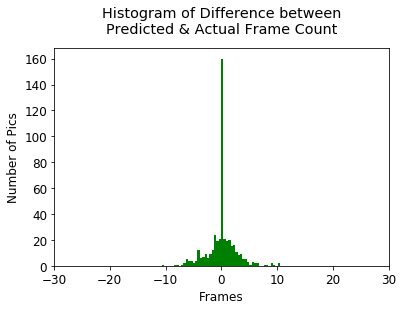

In [92]:
print(f"Min Diff: {X_test_w_pred_rfm_test['frame_diff'].min()}, Max Diff: "+
                f"{X_test_w_pred_rfm_test['frame_diff'].max()}")
(X_test_w_pred_rfm_test['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

In [93]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_w_pred_rfm_test['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_w_pred_rfm_test['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_w_pred_rfm_test['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_w_pred_rfm_test['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_w_pred_rfm_test['binned_frame_diff'] = X_test_w_pred_rfm_test['y_actual_binned'] - \
                                              X_test_w_pred_rfm_test['y_pred_binned']
X_test_w_pred_rfm_test['abs_binned_frame_diff'] = abs(X_test_w_pred_rfm_test['binned_frame_diff'])
X_test_w_pred_rfm_test

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        904   1957     2.0    0.0    1.0   0.0     1.0    0.0   
1       1017   2252     1.0    0.0    1.0   0.0     0.0    0.0   
2       1144   2612     2.0    0.0    0.0   0.0     0.0    0.0   
3       1077   2414     1.0    0.0    1.0   0.0     0.0    0.0   
4        180    398     2.0    0.0    0.0   0.0     0.0    0.0   
5        508    802     2.0    0.0    0.0   0.0     0.0    0.0   
6       2245   3922     2.0    0.0    0.0   0.0     0.0    0.0   
7        258    476     1.0    0.0    1.0   0.0     0.0    0.0   
8       2075   3724     1.0    0.0    1.0   0.0     0.0    0.0   
9       1443   3085     2.0    0.0    0.0   0.0     0.0    0.0   
10      1534   3176     2.0    0.0    0.0   0.0     0.0    0.0   
11        74    228     2.0    0.0    1.0   0.0     0.0    0.0   
12       747   1452     2.0    0.0    0.0   0.0     0.0    0.0   
13       380    598     2.0    0.0    0.0   0.0     0.0    0.0   
14      2005   3649     2.0    0.0    0.0   0.0     0.0    0.0   
15       503    797     2.0    0.0    0.0   0.0     0.0    0.0   
16       157    375     1.0    0.0    1.0   0.0     0.0    0.0   
17       541    938     2.0    0.0    0.0   0.0     0.0    0.0   
18       544    943     2.0    0.0    1.0   0.0     0.0    0.0   
19      1801   3443     2.0    0.0    0.0   0.0     0.0    0.0   
20      2118   3769     2.0    0.0    0.0   0.0     0.0    0.0   
21      1057   2358     1.0    0.0    1.0   0.0     0.0    0.0   
22       357    575     2.0    0.0    0.0   0.0     0.0    0.0   
23       704   1345     2.0    0.0    0.0   0.0     0.0    0.0   
24       962   2114     2.0    0.0    0.0   0.0     0.0    0.0   
25      1647   3289     2.0    0.0    0.0   0.0     0.0    0.0   
26       226    444     2.0    0.0    0.0   0.0     0.0    0.0   
27       910   1963     2.0    0.0    1.0   0.0     1.0    0.0   
28      1491   3133     2.0    0.0    0.0   0.0     0.0    0.0   
29        92    310     1.0    0.0    1.0   0.0     0.0    0.0   
30        96    314     2.0    0.0    2.0   0.0     0.0    0.0   
31      1933   3577     2.0    0.0    0.0   0.0     0.0    0.0   
32      1481   3123     2.0    0.0    0.0   0.0     0.0    0.0   
33      1155   2623     2.0    0.0    0.0   0.0     0.0    0.0   
34        65    197     2.0    0.0    2.0   0.0     0.0    0.0   
35      2083   3732     1.0    0.0    1.0   0.0     0.0    0.0   
36       553    964     2.0    0.0    1.0   0.0     1.0    0.0   
37       740   1435     2.0    0.0    0.0   0.0     0.0    0.0   
38      1682   3324     2.0    0.0    0.0   0.0     0.0    0.0   
39      1671   3313     2.0    0.0    0.0   0.0     0.0    0.0   
40       280    498     2.0    0.0    0.0   0.0     0.0    0.0   
41       796   1575     2.0    0.0    0.0   0.0     0.0    0.0   
42      1593   3235     2.0    0.0    0.0   0.0     0.0    0.0   
43       621   1136     1.0    0.0    1.0   0.0     0.0    0.0   
44       950   2085     2.0    0.0    0.0   0.0     0.0    0.0   
45      1828   3470     2.0    0.0    0.0   0.0     0.0    0.0   
46      2091   3740     2.0    0.0    0.0   0.0     0.0    0.0   
47        98    316     2.0    0.0    0.0   0.0     0.0    0.0   
48        25    138     2.0    0.0    2.0   0.0     0.0    0.0   
49      1619   3261     2.0    0.0    0.0   0.0     0.0    0.0   
50       889   1941     2.0    0.0    1.0   0.0     1.0    0.0   
51      2156   3807     2.0    0.0    0.0   0.0     0.0    0.0   
52       267    485     2.0    0.0    0.0   0.0     0.0    0.0   
53      1037   2305     1.0    0.0    1.0   0.0     0.0    0.0   
54       994   2192     2.0    0.0    0.0   0.0     0.0    0.0   
55      1685   3327     2.0    0.0    0.0   0.0     0.0    0.0   
56      1824   3466     2.0    0.0    0.0   0.0     0.0    0.0   
57       473    691     1.0    0.0    1.0   0.0     0.0    0.0   
58      1430   3072     2.0    0.0    0.0   0.0     0.0    0.0   
59      1406   3048     2.0    0.0    0.0   0

In [94]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_w_pred_rfm_test[X_test_w_pred_rfm_test['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_w_pred_rfm_test['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 60.61%
% Predictions Within 2 Frames        : 74.40%
% Predictions Within 3 Frames        : 83.37%


#### XGBoost

In [95]:
# Train model on entire Training set
xgbb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.7, gamma=0,
                    importance_type='gain', learning_rate=0.03, max_delta_step=0,
                    max_depth=7, min_child_weight=4, missing=None, n_estimators=700,
                    n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
                    subsample=0.7, verbosity=1)
xgbb_model = xgbb.fit(X_train[features], y_train)
xgbb_predict_test = xgbb.predict(X_test[features])
rsq = xgbb.score(X_test[features], y_test)
adj_rsq = 1 - (1-rsq)*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))
mae = mean_absolute_error(y_test, xgbb_predict_test)
rmse = sqrt(mean_squared_error(y_test, xgbb_predict_test))

#### Getting dataframe with prediction errors

In [96]:
X_test_w_pred_xgbb_test = X_test.copy()
X_test_w_pred_xgbb_test.reset_index(inplace=True)
df_y_test_xgbb_test = pd.DataFrame({'y_actual': y_test})
df_y_test_xgbb_test.reset_index(inplace=True)
X_test_w_pred_xgbb_test['y_actual'] = df_y_test_xgbb_test['y_actual'].values
X_test_w_pred_xgbb_test['y_pred'] = xgbb_predict_test
X_test_w_pred_xgbb_test['frame_diff'] = X_test_w_pred_xgbb_test['y_actual'] - X_test_w_pred_xgbb_test['y_pred']
X_test_w_pred_xgbb_test['abs_frame_diff'] = abs(X_test_w_pred_xgbb_test['y_actual'] - X_test_w_pred_xgbb_test['y_pred'])

print(f"R-squared          : {rsq:1.5}")
print(f"Adjusted R-squared : {adj_rsq:1.5}")
print(f"MAE                : {mae:1.5} frames")
print(f"RMSE               : {rmse:1.5} frames")

# Mean difference for incorrect predictions
test_xgbb_diff = X_test_w_pred_xgbb_test['y_actual'] - X_test_w_pred_xgbb_test['y_pred']
mean_frame_diff = abs(test_xgbb_diff[test_xgbb_diff >= 0.5]).mean()
median_frame_diff = np.median(abs(test_xgbb_diff[test_xgbb_diff >= 0.5]))

print()
print(f"Mean difference for Incorrect Predictions:   {mean_frame_diff:2.2} frames")
print(f"Median difference for Incorrect Predictions: {median_frame_diff:2.2} frames")

# Computing how many % of Within Frame Errors
within1frames = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 1.25]) / 
                 len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)
within2frames = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 2.25]) / 
                 len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)
within3frames = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_frame_diff'] < 3.25]) / 
                 len(X_test_w_pred_xgbb_test['abs_frame_diff']) * 100)

print()
print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

R-squared          : 0.78465
Adjusted R-squared : 0.78512
MAE                : 1.6461 frames
RMSE               : 2.6144 frames

Mean difference for Incorrect Predictions:   2.5 frames
Median difference for Incorrect Predictions: 1.9 frames

% Predictions Within 1 Frame         : 58.64%
% Predictions Within 2 Frames        : 73.74%
% Predictions Within 3 Frames        : 84.25%


Min Diff: -10.779573440551758, Max Diff: 11.469550086259842


Text(0.5, 0, 'Frames')

Text(0, 0.5, 'Number of Pics')

Text(0.5, 1.04, 'Histogram of Difference between\nPredicted & Actual Frame Count')

(-30, 30)

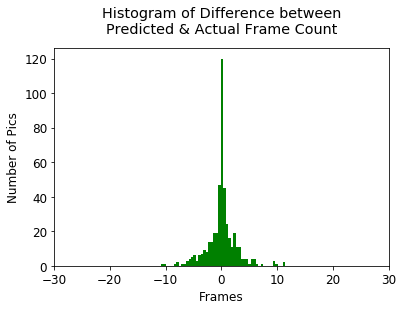

In [97]:
print(f"Min Diff: {X_test_w_pred_xgbb_test['frame_diff'].min()}, Max Diff: "+
                f"{X_test_w_pred_xgbb_test['frame_diff'].max()}")
(X_test_w_pred_xgbb_test['frame_diff']).hist(bins=(50), color='green');
plt.xlabel("Frames")
plt.ylabel("Number of Pics")
plt.title("Histogram of Difference between\nPredicted & Actual Frame Count", y=1.04);
plt.xlim(-30,30);
plt.grid(False)

In [98]:
# Bins are 1/2 frames - Centered
bins = pd.IntervalIndex.from_tuples([(-0.5,0.5), (0.5,1.5), (1.5,2.5), (2.5,3.5), (3.5,4.5), (4.5,5.5),
                                     (5.5,6.5), (6.5,7.5), (7.5,8.5), (8.5,9.5), (9.5,10.5), (10.5,11.5),
                                     (11.5,12.5), (12.5,13.5), (13.5,14.5), (14.5,15.5), (15.5,16.5), (16.5,17.5),
                                     (17.5,18.5), (18.5,19.5), (19.5,20.5), (20.5, 100)])

# Computing binned actual frame count
fs_binned_actual = pd.cut(X_test_w_pred_xgbb_test['y_actual'], bins)
fs_binned_actual = pd.DataFrame(data=fs_binned_actual)

for i in range(len(bins)):
    fs_binned_actual.loc[fs_binned_actual['y_actual'] == bins[i], 'bin_num'] = i

# Computing binned predicted frame count
fs_binned_pred = pd.cut(X_test_w_pred_xgbb_test['y_pred'], bins)
fs_binned_pred = pd.DataFrame(data=fs_binned_pred)

for i in range(len(bins)):
    fs_binned_pred.loc[fs_binned_pred['y_pred'] == bins[i], 'bin_num'] = i

# Adding binned frame count to dataframe
X_test_w_pred_xgbb_test['y_actual_binned'] = fs_binned_actual['bin_num']
X_test_w_pred_xgbb_test['y_pred_binned'] = fs_binned_pred['bin_num']

# Computing difference & absolute binned frame error
X_test_w_pred_xgbb_test['binned_frame_diff'] = X_test_w_pred_xgbb_test['y_actual_binned'] - \
                                              X_test_w_pred_xgbb_test['y_pred_binned']
X_test_w_pred_xgbb_test['abs_binned_frame_diff'] = abs(X_test_w_pred_xgbb_test['binned_frame_diff'])
X_test_w_pred_xgbb_test

level_0  index  Deep10  Deep8  Med10  Med8  Shal10  Shal8  \
0        904   1957     2.0    0.0    1.0   0.0     1.0    0.0   
1       1017   2252     1.0    0.0    1.0   0.0     0.0    0.0   
2       1144   2612     2.0    0.0    0.0   0.0     0.0    0.0   
3       1077   2414     1.0    0.0    1.0   0.0     0.0    0.0   
4        180    398     2.0    0.0    0.0   0.0     0.0    0.0   
5        508    802     2.0    0.0    0.0   0.0     0.0    0.0   
6       2245   3922     2.0    0.0    0.0   0.0     0.0    0.0   
7        258    476     1.0    0.0    1.0   0.0     0.0    0.0   
8       2075   3724     1.0    0.0    1.0   0.0     0.0    0.0   
9       1443   3085     2.0    0.0    0.0   0.0     0.0    0.0   
10      1534   3176     2.0    0.0    0.0   0.0     0.0    0.0   
11        74    228     2.0    0.0    1.0   0.0     0.0    0.0   
12       747   1452     2.0    0.0    0.0   0.0     0.0    0.0   
13       380    598     2.0    0.0    0.0   0.0     0.0    0.0   
14      2005   3649     2.0    0.0    0.0   0.0     0.0    0.0   
15       503    797     2.0    0.0    0.0   0.0     0.0    0.0   
16       157    375     1.0    0.0    1.0   0.0     0.0    0.0   
17       541    938     2.0    0.0    0.0   0.0     0.0    0.0   
18       544    943     2.0    0.0    1.0   0.0     0.0    0.0   
19      1801   3443     2.0    0.0    0.0   0.0     0.0    0.0   
20      2118   3769     2.0    0.0    0.0   0.0     0.0    0.0   
21      1057   2358     1.0    0.0    1.0   0.0     0.0    0.0   
22       357    575     2.0    0.0    0.0   0.0     0.0    0.0   
23       704   1345     2.0    0.0    0.0   0.0     0.0    0.0   
24       962   2114     2.0    0.0    0.0   0.0     0.0    0.0   
25      1647   3289     2.0    0.0    0.0   0.0     0.0    0.0   
26       226    444     2.0    0.0    0.0   0.0     0.0    0.0   
27       910   1963     2.0    0.0    1.0   0.0     1.0    0.0   
28      1491   3133     2.0    0.0    0.0   0.0     0.0    0.0   
29        92    310     1.0    0.0    1.0   0.0     0.0    0.0   
30        96    314     2.0    0.0    2.0   0.0     0.0    0.0   
31      1933   3577     2.0    0.0    0.0   0.0     0.0    0.0   
32      1481   3123     2.0    0.0    0.0   0.0     0.0    0.0   
33      1155   2623     2.0    0.0    0.0   0.0     0.0    0.0   
34        65    197     2.0    0.0    2.0   0.0     0.0    0.0   
35      2083   3732     1.0    0.0    1.0   0.0     0.0    0.0   
36       553    964     2.0    0.0    1.0   0.0     1.0    0.0   
37       740   1435     2.0    0.0    0.0   0.0     0.0    0.0   
38      1682   3324     2.0    0.0    0.0   0.0     0.0    0.0   
39      1671   3313     2.0    0.0    0.0   0.0     0.0    0.0   
40       280    498     2.0    0.0    0.0   0.0     0.0    0.0   
41       796   1575     2.0    0.0    0.0   0.0     0.0    0.0   
42      1593   3235     2.0    0.0    0.0   0.0     0.0    0.0   
43       621   1136     1.0    0.0    1.0   0.0     0.0    0.0   
44       950   2085     2.0    0.0    0.0   0.0     0.0    0.0   
45      1828   3470     2.0    0.0    0.0   0.0     0.0    0.0   
46      2091   3740     2.0    0.0    0.0   0.0     0.0    0.0   
47        98    316     2.0    0.0    0.0   0.0     0.0    0.0   
48        25    138     2.0    0.0    2.0   0.0     0.0    0.0   
49      1619   3261     2.0    0.0    0.0   0.0     0.0    0.0   
50       889   1941     2.0    0.0    1.0   0.0     1.0    0.0   
51      2156   3807     2.0    0.0    0.0   0.0     0.0    0.0   
52       267    485     2.0    0.0    0.0   0.0     0.0    0.0   
53      1037   2305     1.0    0.0    1.0   0.0     0.0    0.0   
54       994   2192     2.0    0.0    0.0   0.0     0.0    0.0   
55      1685   3327     2.0    0.0    0.0   0.0     0.0    0.0   
56      1824   3466     2.0    0.0    0.0   0.0     0.0    0.0   
57       473    691     1.0    0.0    1.0   0.0     0.0    0.0   
58      1430   3072     2.0    0.0    0.0   0.0     0.0    0.0   
59      1406   3048     2.0    0.0    0.0   0

In [99]:
# Computing Binned Frame Accuracy
within1frames = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 1.25]) / 
                 len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)
within2frames = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 2.25]) / 
                 len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)
within3frames = (len(X_test_w_pred_xgbb_test[X_test_w_pred_xgbb_test['abs_binned_frame_diff'] < 3.25]) / 
                 len(X_test_w_pred_xgbb_test['abs_binned_frame_diff']) * 100)

print(f"% Predictions Within 1 Frame         : {within1frames:3.2f}%")
print(f"% Predictions Within 2 Frames        : {within2frames:3.2f}%")
print(f"% Predictions Within 3 Frames        : {within3frames:3.2f}%")

% Predictions Within 1 Frame         : 61.71%
% Predictions Within 2 Frames        : 76.81%
% Predictions Within 3 Frames        : 85.34%


### Creating updated model file

In [101]:
# Train model on entire Training set
rfm = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                            max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0, warm_start=False)
rfm_model = rfm.fit(X, y)
rfm_predict = rfm.predict(X)
rsq = rfm.score(X, y)
adj_rsq = 1 - (1-rsq)*(len(y)-1)/(len(y)-X.shape[1]-1)
mae = mean_absolute_error(y, xgbb_predict)
rmse = sqrt(mean_squared_error(y, xgbb_predict))
print("R-sq  AdjRsq MAE, RMSE")
print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

R-sq  AdjRsq MAE, RMSE
0.971 0.97 0.252 0.368


In [102]:
import pickle

pickle.dump(rfm_model, open(DIR + "analysis_tests/models/" + 
                            "RF_model_2019-07-15_regression_darksky_filt_DDSH.pkl", 'wb'))

In [103]:
from xgboost import XGBRegressor

xgbb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=0.7, gamma=0,
                    importance_type='gain', learning_rate=0.03, max_delta_step=0,
                    max_depth=7, min_child_weight=4, missing=None, n_estimators=700,
                    n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
                    subsample=0.7, verbosity=1)
xgbb_model = xgbb.fit(X, y)
xgbb_predict = xgbb.predict(X)
rsq = xgbb.score(X, y)
adj_rsq = 1 - (1-rsq)*(len(y)-1)/(len(y)-X.shape[1]-1)
mae = mean_absolute_error(y, xgbb_predict)
rmse = sqrt(mean_squared_error(y, xgbb_predict))
print("R-sq  AdjRsq MAE, RMSE")
print(round(rsq, 3), round(adj_rsq, 3), round(mae, 3), round(rmse, 3))

R-sq  AdjRsq MAE, RMSE
0.996 0.996 0.252 0.368


In [104]:
import pickle

pickle.dump(xgbb_model, open(DIR + "analysis_tests/models/" + 
                            "XGB_model_2019-07-15_regression_darksky_filt_DDSH.pkl", 'wb'))